# Pruba 2 
Realizado por: Sandra Peñaranda

### Personas por dia:  Media por provincia de las personas infectadas multiplicada por un factor de 3

In [104]:
#Implementar
#Obtenemos la media para la tasa de crecimiento
import pandas as pd

url = 'Casos covid por provincias.xlsx'
df = pd.read_excel(url)
df = df.fillna(0)

start_date = '17/3/2020'
country_df = df[df['Provincia'] == 'SantaElena']
country_df = country_df.drop('16/3/2020',1)
country_df = country_df.drop('18/3/2020',1)
country_df = country_df.drop('19/3/2020',1)
media = country_df.iloc[0].loc[start_date:]
media = media.mean()
print('La media es de ',round(media))
#Personas por dia o Tasa de CRECIMIENTO
tasa = round(media*3)
print("Tasa crecimiento", tasa)

La media es de  57.0
Tasa crecimiento 170.0


+ Simular por 100 dias
+ Recursos Provincias.
+ Resultados por tipo de paciente y estado
+ Iniciar con 100 pacientes todas las provincias para efectos de simulación
+ Adjuntar los resultados por genero utilizando una grafica de histograma.

In [105]:
#Implementar
##Primero sacamos la media
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

#PARAMETROS
#Fuente https://www.elcomercio.com/actualidad/parroquia-santa-elena-muertos-coronavirus.html
HOSPITALES = 1
CAMA_HOSPITAL = 110
RESPIRADORES = 15
CUIDADOS_INTENSIVOS = 15
PERSONAL = 242

#El valor de la tasa de crecimiento es la media de los nuevos casos presentados en SANTA ELENA
INFECTADOS_ACTULES = 100
TASA_CRECIMIENTO = 170
DIAS_INTERNADO = 10 #Tiempo en dias
DIAS_SIMULACION = 100 #Tiempo en dias

#Lista para realizar las graficas
ninias = []
ninias_sintomas = []
ninias_neumonia = []
ninias_intensivo = []
ninias_fallecidas = []
ninias_recuperadas = []

ninios = []
ninios_sintomas = []
ninios_neumonia = []
ninios_intensivo = []
ninios_fallecidas = []
ninios_recuperadas = []

mujeres = []
mujeres_neumonia = []
mujeres_intensivo = []
mujeres_fallecidas = []
mujeres_recuperadas = []

varones = []
varones_neumonia = []
varones_intensivo = []
varones_fallecidas = []
varones_recuperadas = []

viejitas = []
viejitas_neumonia = []
viejitas_intensivo = []
viejitas_fallecidas = []
viejitas_recuperadas = []

viejitos = []
viejitos_neumonia = []
viejitos_intensivo = []
viejitos_fallecidas = []
viejitos_recuperadas = []

class Hospital(object):
    def __init__(self, env, numero_camas, n_respiradores, personal, cuidados_intensivos, name):
            self.env = env
            self.numero_camas = numero_camas
            self.n_respiradores = n_respiradores
            self.camas = simpy.Resource(env, numero_camas)
            self.respiradores = simpy.Resource(env, n_respiradores)
            self.personal = simpy.Resource(env, personal)
            self.intensivos = simpy.Resource(env, cuidados_intensivos)
            self.name = name
                  
    def asignar_cama_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-8, DIAS_INTERNADO+5))
        print("El paciente", paciente, "ha sido dado de alta de HOSPITALIZACION en", int(self.env.now), 'dias')
        
    def cuidados_intensivos(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+11))
        print("El paciente", paciente, "ha sido dado de alta de CUIDADOS INTENSIVOS en ", int(self.env.now), 'dias')

def llegada_paciente(env,hospital,paciente):
    llegada = env.now
    tipo_paciente = random.randint(1,100)
    ##PACIENTE NINIO
    if(tipo_paciente <= 28 and tipo_paciente > 7):
        tipo_genero_ninio = random.randint(1,28)
        if(tipo_genero_ninio<=15):
            ##NINIA
            ninias.append(1)
            ##PRIMERA ETAPA
            sintomas = random.randint(1,100)
            if(sintomas < 6):
                ninias_sintomas.append(1)
                ##SEGUNDA ETAPA 
                neumonia = random.randint(1,100)
                if(neumonia < 76):
                    ninias_neumonia.append(1)
                    ##ASIGNACION DE CAMAS
                    with hospital.camas.request() as cama:
                        #Esperara por una cama entre 5 y 15 dias
                        tiempo_espera_cama=random.randint(5,15)
                        requerimiento_cama = yield cama | env.timeout(tiempo_espera_cama)
                        esperando = env.now - llegada
                        if cama in requerimiento_cama:
                            print("A la NIÑA", paciente, " se le asigna una CAMA para ser atendido en", esperando, "dias")
                            yield env.process(hospital.asignar_cama_paciente(paciente))
                            llegada_personal = env.now
                            
                            ##ASIGNARI PERSONAL
                            with hospital.personal.request() as personal:
                                #Esperara por una cama entre 3 horas y 6 horas
                                tiempo_espera_personal=random.uniform(0.13,0.25)
                                requerimiento_personal = yield personal | env.timeout(tiempo_espera_personal) 
                                espera_personal = env.now - llegada_personal
                                if personal in requerimiento_personal:
                                    print("La NIÑA", paciente, "contó con personal médico, luego de",int(tiempo_espera_personal*24) ,"horas")
                                
                                area_cuidados_intensivos = random.randint(1,100) 
                                if (area_cuidados_intensivos < 26):
                                    ninias_intensivo.append(1)
                                    ##PACIENTE TRASLADO CUIDADOS INTENSIVOS
                                    with hospital.intensivos.request() as intensivo:
                                        llegada_intensivos = env.now
                                        #Espera de 8 a 16 horas
                                        tiempo_espera_intensivo = random.randint(7,21)
                                        requerimiento_intensivos = yield intensivo | env.timeout(tiempo_espera_intensivo)
                                        espera_intensivo = env.now - llegada_intensivos
                                        if(intensivo in requerimiento_intensivos):
                                            print("La Niña", paciente, "es trasladado a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de", tiempo_espera_intensivo,"dias")
                                            yield env.process(hospital.cuidados_intensivos(paciente))
                                            estado_intensivos = random.randint(1,100)
                                            if(estado_intensivos < 51):
                                                ninias_fallecidas.append(1)
                                            else:
                                                ninias_recuperadas.append(1)
                                        else:
                                            print("La NIÑA",paciente, "esperó", espera_intensivo,"dias y fallecio por falta de camas en CUIDADOS INTENSIVOS") 
                                            ninias_fallecidas.append(1)
                                else:
                                    print("La NIÑA" , paciente, "esperó", int(espera_personal) , "y se recuperá")
                                    ninias_fallecidas.append(1)
                        else:
                            print("La NIÑA", paciente, "esperó", esperando, " dias y fallece por falta de CAMAS")
                            ninias_fallecidas.append(1)

                #SEGUNDA_ETAPA
                else:
                    print("La NIÑA", paciente, "se recupero en NEUMONIA")
                    ninias_recuperadas.append(1)
            ##PRIMERA ETAPA
            else:
                print("La NIÑA", paciente, "se recuperó en la PRIMERA ETAPA" )
                ninias_recuperadas.append(1)
        #####NINIO    
        else:
            ninios.append(1)
            ##PRIMERA ETAPA
            sintomas = random.randint(1,100)
            if(sintomas < 6):
                ninios_sintomas.append(1)
                ##SEGUNDA ETAPA 
                neumonia = random.randint(1,100)
                if(neumonia < 76):
                    ninios_neumonia.append(1)
                    ##ASIGNACION DE CAMAS
                    with hospital.camas.request() as cama:
                        #Esperara por una cama entre 14 horas y 36 horas
                        tiempo_espera_cama=random.randint(5,15)
                        requerimiento_cama = yield cama | env.timeout(tiempo_espera_cama)
                        esperando = env.now - llegada
                        if cama in requerimiento_cama:
                            print("Al NIÑO", paciente, " se le asigna una CAMA para ser atendido en", esperando, "dias")
                            yield env.process(hospital.asignar_cama_paciente(paciente))
                            llegada_personal = env.now
                            ##ASIGNARI PERSONAL
                            with hospital.personal.request() as personal:
                                #Esperara por una cama entre 3 horas y 6 horas
                                tiempo_espera_personal=random.uniform(0.13,0.25)
                                requerimiento_personal = yield personal | env.timeout(tiempo_espera_personal) 
                                espera_personal = env.now - llegada_personal
                                if personal in requerimiento_personal:
                                    print("El NIÑO", paciente, "contó con personal médico, luego de",int(tiempo_espera_personal*24) ,"horas")
                                area_cuidados_intensivos = random.randint(1,100) 
                                if (area_cuidados_intensivos < 26):
                                    ninias_intensivo.append(1)
                                    ##PACIENTE TRASLADO CUIDADOS INTENSIVOS
                                    with hospital.intensivos.request() as intensivo:
                                        llegada_intensivos = env.now
                                        #Espera de 8 a 16 horas
                                        tiempo_espera_intensivo = random.randint(7,21)
                                        requerimiento_intensivos = yield intensivo | env.timeout(tiempo_espera_intensivo)
                                        espera_intensivo = env.now - llegada_intensivos
                                        if(intensivo in requerimiento_intensivos):
                                            print("El NIÑO", paciente, "es trasladado a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de", tiempo_espera_intensivo,"dias")
                                            yield env.process(hospital.cuidados_intensivos(paciente))
                                            estado_intensivos = random.randint(1,100)
                                            if(estado_intensivos < 51):
                                                ninios_fallecidas.append(1)
                                            else:
                                                ninios_recuperadas.append(1)
                                        else:
                                            print("El NIÑO",paciente, "esperó", espera_intensivo,"horas y fallecio por falta de camas en CUIDADOS INTENSIVOS") 
                                            ninios_fallecidas.append(1)
                                else:
                                    print("El NIÑO" , paciente, "esperó", int(espera_personal) , "y se recuperá")
                                    ninios_fallecidas.append(1)
                        else:
                            print("El NIÑO", paciente, "esperó", esperando, " horas y fallece por falta de CAMAS")
                            ninios_fallecidas.append(1)
                #SEGUNDA_ETAPA
                else:
                    print("El NIÑO", paciente, "se recupero en NEUMONIA")
                    ninios_recuperadas.append(1)
            ##PRIMERA ETAPA
            else:
                print("El NIÑO", paciente, "se recuperó en la PRIMERA ETAPA" )
                ninios_recuperadas.append(1)
        #FIN NIÑOS#  
        
    ##PACIENTE ADULTO    
    elif(tipo_paciente >28 and tipo_paciente <= 65):
        tipo_genero_adulto = random.randint(1,65)
        if(tipo_genero_adulto <= 35):
            ##MUJER
            mujeres.append(1)
            ##SEGUNDA ETAPA 
            neumonia = random.randint(1,100)
            if(neumonia < 76):
                mujeres_neumonia.append(1)
                ##ASIGNACION DE CAMAS
                with hospital.camas.request() as cama:
                    tiempo_espera_cama=random.randint(5,15)
                    requerimiento_cama = yield cama | env.timeout(tiempo_espera_cama)
                    esperando = env.now - llegada
                    if cama in requerimiento_cama:
                        print("A la señora", paciente, " se le asigna una CAMA para ser atendido en", esperando, "dias")
                        yield env.process(hospital.asignar_cama_paciente(paciente))
                        llegada_personal = env.now
                        ##ASIGNARI PERSONAL
                        with hospital.personal.request() as personal:
                            #Esperara por una cama entre 3 horas y 6 horas
                            tiempo_espera_personal=random.uniform(0.13,0.25)
                            requerimiento_personal = yield personal | env.timeout(tiempo_espera_personal) 
                            espera_personal = env.now - llegada_personal
                            if personal in requerimiento_personal:
                                print("La señora", paciente, "contó con personal médico, luego de",int(tiempo_espera_personal*24) ,"horas")
                            area_cuidados_intensivos = random.randint(1,100) 
                            if (area_cuidados_intensivos < 26):
                                mujeres_intensivo.append(1)
                                ##PACIENTE TRASLADO CUIDADOS INTENSIVOS
                                with hospital.intensivos.request() as intensivo:
                                    llegada_intensivos = env.now
                                    #Espera de 8 a 16 horas
                                    tiempo_espera_intensivo = random.randint(7,21)
                                    requerimiento_intensivos = yield intensivo | env.timeout(tiempo_espera_intensivo)
                                    espera_intensivo = env.now - llegada_intensivos
                                    if(intensivo in requerimiento_intensivos):
                                        print("La señora", paciente, "es trasladada a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de", tiempo_espera_intensivo,"dias")
                                        yield env.process(hospital.cuidados_intensivos(paciente))
                                        estado_intensivos = random.randint(1,100)
                                        if(estado_intensivos < 51):
                                            mujeres_fallecidas.append(1)
                                        else:
                                            mujeres_recuperadas.append(1)
                                    else:
                                        print("La señora",paciente, "esperó", espera_intensivo,"dias y fallecio por falta de camas en CUIDADOS INTENSIVOS") 
                                        mujeres_fallecidas.append(1)
                            else:
                                print("La señora" , paciente, "esperó", int(espera_personal) , "y se recuperá")
                                mujeres_fallecidas.append(1)
                    else:
                        print("La señora", paciente, "esperó", esperando, " dias y fallece por falta de CAMAS")
                        mujeres_fallecidas.append(1)
                #SEGUNDA_ETAPA
            else:
                print("La señora", paciente, "se recupero en NEUMONIA")
                mujeres_recuperadas.append(1)
        else:
            ##VARONES
            varones.append(1)
            ##SEGUNDA ETAPA 
            neumonia = random.randint(1,100)
            if(neumonia < 76):
                varones_neumonia.append(1)
                ##ASIGNACION DE CAMAS
                with hospital.camas.request() as cama:
                    tiempo_espera_cama=random.randint(5,15)
                    requerimiento_cama = yield cama | env.timeout(tiempo_espera_cama)
                    esperando = env.now - llegada
                    if cama in requerimiento_cama:
                        print("Al señor", paciente, " se le asigna una CAMA para ser atendido en", esperando, "dias")
                        yield env.process(hospital.asignar_cama_paciente(paciente))
                        llegada_personal = env.now
                        ##ASIGNARI PERSONAL
                        with hospital.personal.request() as personal:
                            #Esperara por una cama entre 3 horas y 6 horas
                            tiempo_espera_personal=random.uniform(0.13,0.25)
                            requerimiento_personal = yield personal | env.timeout(tiempo_espera_personal) 
                            espera_personal = env.now - llegada_personal
                            if personal in requerimiento_personal:
                                print("El señor", paciente, "contó con personal médico, luego de",int(tiempo_espera_personal*24) ,"horas")
                            area_cuidados_intensivos = random.randint(1,100) 
                            if (area_cuidados_intensivos < 26):
                                varones_intensivo.append(1)
                                ##PACIENTE TRASLADO CUIDADOS INTENSIVOS
                                with hospital.intensivos.request() as intensivo:
                                    llegada_intensivos = env.now
                                    #Espera de 8 a 16 horas
                                    tiempo_espera_intensivo = random.randint(7,21)
                                    requerimiento_intensivos = yield intensivo | env.timeout(tiempo_espera_intensivo)
                                    espera_intensivo = env.now - llegada_intensivos
                                    if(intensivo in requerimiento_intensivos):
                                        print("El señor", paciente, "es trasladado a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de", tiempo_espera_intensivo,"dias")
                                        yield env.process(hospital.cuidados_intensivos(paciente))
                                        estado_intensivos = random.randint(1,100)
                                        if(estado_intensivos < 51):
                                            varones_fallecidas.append(1)
                                        else:
                                            varones_recuperadas.append(1)
                                    else:
                                        print("El señor",paciente, "esperó", espera_intensivo,"dias y fallecio por falta de camas en CUIDADOS INTENSIVOS") 
                                        varones_fallecidas.append(1)
                            else:
                                print("El señor" , paciente, "esperó", int(espera_personal) , "y se recuperá")
                                varones_fallecidas.append(1)
                    else:
                        print("El señor", paciente, "esperó", esperando, " dias y fallece por falta de CAMAS")
                        varones_fallecidas.append(1)
                #SEGUNDA_ETAPA
            else:
                print("El señor", paciente, "se recupero en NEUMONIA")
                varones_recuperadas.append(1)
            ###FIN ADULTOS ##############
            
    ##PACIENTE MAYOR
    else:
        tipo_genero_adulto = random.randint(1,7)
        if(tipo_genero_adulto <= 4):
            ##VIEJITA
            viejitas.append(1)
            ##SEGUNDA ETAPA 
            neumonia = random.randint(1,100)
            if(neumonia < 96):
                viejitas_neumonia.append(1)
                ##ASIGNACION DE CAMAS
                with hospital.camas.request() as cama:
                    tiempo_espera_cama=random.randint(5,15)
                    requerimiento_cama = yield cama | env.timeout(tiempo_espera_cama)
                    esperando = env.now - llegada
                    if cama in requerimiento_cama:
                        print("A la viejita", paciente, " se le asigna una CAMA para ser atendido en", esperando, "dias")
                        yield env.process(hospital.asignar_cama_paciente(paciente))
                        llegada_personal = env.now
                        ##ASIGNARI PERSONAL
                        with hospital.personal.request() as personal:
                            #Esperara por una cama entre 3 horas y 6 horas
                            tiempo_espera_personal=random.uniform(0.13,0.25)
                            requerimiento_personal = yield personal | env.timeout(tiempo_espera_personal) 
                            espera_personal = env.now - llegada_personal
                            if personal in requerimiento_personal:
                                print("La viejita", paciente, "contó con personal médico, luego de",int(tiempo_espera_personal*24) ,"horas")
                            area_cuidados_intensivos = random.randint(1,100) 
                            if (area_cuidados_intensivos < 26):
                                viejitas_intensivo.append(1)
                                ##PACIENTE TRASLADO CUIDADOS INTENSIVOS
                                with hospital.intensivos.request() as intensivo:
                                    llegada_intensivos = env.now
                                    #Espera de 8 a 16 horas
                                    tiempo_espera_intensivo = random.randint(7,21)
                                    requerimiento_intensivos = yield intensivo | env.timeout(tiempo_espera_intensivo)
                                    espera_intensivo = env.now - llegada_intensivos
                                    if(intensivo in requerimiento_intensivos):
                                        print("La viejita", paciente, "es trasladada a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de", tiempo_espera_intensivo,"dias")
                                        yield env.process(hospital.cuidados_intensivos(paciente))
                                        estado_intensivos = random.randint(1,100)
                                        if(estado_intensivos < 51):
                                            viejitas_fallecidas.append(1)
                                        else:
                                            viejitas_recuperadas.append(1)
                                    else:
                                        print("La viejita",paciente, "esperó", espera_intensivo,"dias y fallecio por falta de camas en CUIDADOS INTENSIVOS") 
                                        viejitas_fallecidas.append(1)
                            else:
                                print("La viejita" , paciente, "esperó", int(espera_personal) , "y se recuperá")
                                viejitas_fallecidas.append(1)
                    else:
                        print("La viejita", paciente, "esperó", esperando, " dias y fallece por falta de CAMAS")
                        viejitas_fallecidas.append(1)
                #SEGUNDA_ETAPA
            else:
                print("La viejita", paciente, "se recupero en NEUMONIA")
                viejitas_recuperadas.append(1)
        else:
            ##VIEJITOS
            viejitos.append(1)
            ##SEGUNDA ETAPA 
            neumonia = random.randint(1,100)
            if(neumonia < 96):
                viejitos_neumonia.append(1)
                ##ASIGNACION DE CAMAS
                with hospital.camas.request() as cama:
                    tiempo_espera_cama=random.randint(5,15)
                    requerimiento_cama = yield cama | env.timeout(tiempo_espera_cama)
                    esperando = env.now - llegada
                    if cama in requerimiento_cama:
                        print("Al viejito", paciente, " se le asigna una CAMA para ser atendido en", esperando, "dias")
                        yield env.process(hospital.asignar_cama_paciente(paciente))
                        llegada_personal = env.now
                        ##ASIGNARI PERSONAL
                        with hospital.personal.request() as personal:
                            #Esperara por una cama entre 3 horas y 6 horas
                            tiempo_espera_personal=random.uniform(0.13,0.25)
                            requerimiento_personal = yield personal | env.timeout(tiempo_espera_personal) 
                            espera_personal = env.now - llegada_personal
                            if personal in requerimiento_personal:
                                print("El viejito", paciente, "contó con personal médico, luego de",int(tiempo_espera_personal*24) ,"horas")
                            area_cuidados_intensivos = random.randint(1,100) 
                            if (area_cuidados_intensivos < 26):
                                viejitos_intensivo.append(1)
                                ##PACIENTE TRASLADO CUIDADOS INTENSIVOS
                                with hospital.intensivos.request() as intensivo:
                                    llegada_intensivos = env.now
                                    #Espera de 8 a 16 horas
                                    tiempo_espera_intensivo = random.randint(7,21)
                                    requerimiento_intensivos = yield intensivo | env.timeout(tiempo_espera_intensivo)
                                    espera_intensivo = env.now - llegada_intensivos
                                    if(intensivo in requerimiento_intensivos):
                                        print("El viejito", paciente, "es trasladado a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de", tiempo_espera_intensivo,"dias")
                                        yield env.process(hospital.cuidados_intensivos(paciente))
                                        estado_intensivos = random.randint(1,100)
                                        if(estado_intensivos < 51):
                                            viejitos_fallecidas.append(1)
                                        else:
                                            viejitos_recuperadas.append(1)
                                    else:
                                        print("El viejito",paciente, "esperó", espera_intensivo,"dias y fallecio por falta de camas en CUIDADOS INTENSIVOS") 
                                        viejitos_fallecidas.append(1)
                            else:
                                print("El viejito" , paciente, "esperó", int(espera_personal) , "y se recuperá")
                                viejitos_fallecidas.append(1)
                    else:
                        print("El viejito", paciente, "esperó", esperando, " dias y fallece por falta de CAMAS")
                        viejitos_fallecidas.append(1)
                #SEGUNDA_ETAPA
            else:
                print("El viejito", paciente, "se recupero en NEUMONIA")
                viejitos_recuperadas.append(1)
    
def ejecutar(env, tasa_crecimiento, contagiados):
    hospital = Hospital(env, CAMA_HOSPITAL, RESPIRADORES, PERSONAL, CUIDADOS_INTENSIVOS, "Liborio Panchana Sotomayor")
    for i in range(contagiados):
        asignar_hospital(env, hospital, i)
    paciente = contagiados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospital, paciente)
                
def asignar_hospital(env, hospital, paciente):
    hospital_asignado = 1
    if (hospital_asignado == 1):
        print("Llega un nuevo paciente", paciente, "en un tiempo de", env.now)
        env.process(llegada_paciente(env, hospital, paciente))

print("Simulacion COVID-19 en la Provincia de SANTA ELENA")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS_ACTULES))
env.run(until=DIAS_SIMULACION)

Simulacion COVID-19 en la Provincia de SANTA ELENA
Llega un nuevo paciente 0 en un tiempo de 0
Llega un nuevo paciente 1 en un tiempo de 0
Llega un nuevo paciente 2 en un tiempo de 0
Llega un nuevo paciente 3 en un tiempo de 0
Llega un nuevo paciente 4 en un tiempo de 0
Llega un nuevo paciente 5 en un tiempo de 0
Llega un nuevo paciente 6 en un tiempo de 0
Llega un nuevo paciente 7 en un tiempo de 0
Llega un nuevo paciente 8 en un tiempo de 0
Llega un nuevo paciente 9 en un tiempo de 0
Llega un nuevo paciente 10 en un tiempo de 0
Llega un nuevo paciente 11 en un tiempo de 0
Llega un nuevo paciente 12 en un tiempo de 0
Llega un nuevo paciente 13 en un tiempo de 0
Llega un nuevo paciente 14 en un tiempo de 0
Llega un nuevo paciente 15 en un tiempo de 0
Llega un nuevo paciente 16 en un tiempo de 0
Llega un nuevo paciente 17 en un tiempo de 0
Llega un nuevo paciente 18 en un tiempo de 0
Llega un nuevo paciente 19 en un tiempo de 0
Llega un nuevo paciente 20 en un tiempo de 0
Llega un nuevo

El NIÑO 125 se recuperó en la PRIMERA ETAPA
El NIÑO 127 se recuperó en la PRIMERA ETAPA
El NIÑO 129 se recuperó en la PRIMERA ETAPA
El NIÑO 130 se recuperó en la PRIMERA ETAPA
La señora 134 se recupero en NEUMONIA
La señora 135 se recupero en NEUMONIA
El NIÑO 138 se recuperó en la PRIMERA ETAPA
La señora 140 se recupero en NEUMONIA
El NIÑO 145 se recuperó en la PRIMERA ETAPA
El NIÑO 147 se recuperó en la PRIMERA ETAPA
El señor 148 se recupero en NEUMONIA
La NIÑA 149 se recuperó en la PRIMERA ETAPA
El NIÑO 150 se recuperó en la PRIMERA ETAPA
La NIÑA 155 se recuperó en la PRIMERA ETAPA
La NIÑA 156 se recuperó en la PRIMERA ETAPA
El NIÑO 158 se recuperó en la PRIMERA ETAPA
La NIÑA 162 se recuperó en la PRIMERA ETAPA
El NIÑO 163 se recuperó en la PRIMERA ETAPA
La señora 166 se recupero en NEUMONIA
La NIÑA 176 se recuperó en la PRIMERA ETAPA
La NIÑA 180 se recuperó en la PRIMERA ETAPA
El NIÑO 182 se recuperó en la PRIMERA ETAPA
El señor 184 se recupero en NEUMONIA
El señor 189 se recupero e

Llega un nuevo paciente 435 en un tiempo de 2
Llega un nuevo paciente 436 en un tiempo de 2
Llega un nuevo paciente 437 en un tiempo de 2
Llega un nuevo paciente 438 en un tiempo de 2
Llega un nuevo paciente 439 en un tiempo de 2
Llega un nuevo paciente 440 en un tiempo de 2
La señora 272 se recupero en NEUMONIA
La NIÑA 273 se recuperó en la PRIMERA ETAPA
La NIÑA 275 se recuperó en la PRIMERA ETAPA
El NIÑO 276 se recuperó en la PRIMERA ETAPA
El señor 285 se recupero en NEUMONIA
La NIÑA 289 se recuperó en la PRIMERA ETAPA
La NIÑA 291 se recuperó en la PRIMERA ETAPA
La señora 297 se recupero en NEUMONIA
El NIÑO 299 se recuperó en la PRIMERA ETAPA
La viejita 300 se recupero en NEUMONIA
El NIÑO 301 se recuperó en la PRIMERA ETAPA
El NIÑO 313 se recuperó en la PRIMERA ETAPA
El NIÑO 316 se recuperó en la PRIMERA ETAPA
La NIÑA 319 se recuperó en la PRIMERA ETAPA
La señora 322 se recupero en NEUMONIA
La señora 323 se recupero en NEUMONIA
El señor 324 se recupero en NEUMONIA
La viejita 329 se r

El señor 516 se recupero en NEUMONIA
La NIÑA 517 se recuperó en la PRIMERA ETAPA
La NIÑA 520 se recuperó en la PRIMERA ETAPA
La NIÑA 524 se recuperó en la PRIMERA ETAPA
La señora 527 se recupero en NEUMONIA
El viejito 529 se recupero en NEUMONIA
El señor 531 se recupero en NEUMONIA
La NIÑA 544 se recuperó en la PRIMERA ETAPA
El NIÑO 545 se recuperó en la PRIMERA ETAPA
La NIÑA 546 se recuperó en la PRIMERA ETAPA
La NIÑA 548 se recuperó en la PRIMERA ETAPA
La NIÑA 550 se recuperó en la PRIMERA ETAPA
La señora 551 se recupero en NEUMONIA
El NIÑO 552 se recuperó en la PRIMERA ETAPA
El NIÑO 556 se recuperó en la PRIMERA ETAPA
La NIÑA 557 se recuperó en la PRIMERA ETAPA
La NIÑA 558 se recuperó en la PRIMERA ETAPA
El NIÑO 560 se recuperó en la PRIMERA ETAPA
La NIÑA 562 se recuperó en la PRIMERA ETAPA
La NIÑA 565 se recuperó en la PRIMERA ETAPA
La señora 566 se recupero en NEUMONIA
El viejito 569 se recupero en NEUMONIA
El señor 570 se recupero en NEUMONIA
El NIÑO 572 se recuperó en la PRIMERA

Llega un nuevo paciente 735 en un tiempo de 4
Llega un nuevo paciente 736 en un tiempo de 4
Llega un nuevo paciente 737 en un tiempo de 4
Llega un nuevo paciente 738 en un tiempo de 4
Llega un nuevo paciente 739 en un tiempo de 4
Llega un nuevo paciente 740 en un tiempo de 4
Llega un nuevo paciente 741 en un tiempo de 4
Llega un nuevo paciente 742 en un tiempo de 4
Llega un nuevo paciente 743 en un tiempo de 4
Llega un nuevo paciente 744 en un tiempo de 4
Llega un nuevo paciente 745 en un tiempo de 4
Llega un nuevo paciente 746 en un tiempo de 4
Llega un nuevo paciente 747 en un tiempo de 4
Llega un nuevo paciente 748 en un tiempo de 4
Llega un nuevo paciente 749 en un tiempo de 4
Llega un nuevo paciente 750 en un tiempo de 4
Llega un nuevo paciente 751 en un tiempo de 4
Llega un nuevo paciente 752 en un tiempo de 4
Llega un nuevo paciente 753 en un tiempo de 4
Llega un nuevo paciente 754 en un tiempo de 4
Llega un nuevo paciente 755 en un tiempo de 4
Llega un nuevo paciente 756 en un 

Llega un nuevo paciente 938 en un tiempo de 5
Llega un nuevo paciente 939 en un tiempo de 5
Llega un nuevo paciente 940 en un tiempo de 5
Llega un nuevo paciente 941 en un tiempo de 5
Llega un nuevo paciente 942 en un tiempo de 5
Llega un nuevo paciente 943 en un tiempo de 5
Llega un nuevo paciente 944 en un tiempo de 5
Llega un nuevo paciente 945 en un tiempo de 5
Llega un nuevo paciente 946 en un tiempo de 5
Llega un nuevo paciente 947 en un tiempo de 5
Llega un nuevo paciente 948 en un tiempo de 5
Llega un nuevo paciente 949 en un tiempo de 5
Llega un nuevo paciente 950 en un tiempo de 5
El viejito 781 se recupero en NEUMONIA
El señor 784 se recupero en NEUMONIA
El señor 785 se recupero en NEUMONIA
La señora 788 se recupero en NEUMONIA
La señora 789 se recupero en NEUMONIA
La viejita 790 se recupero en NEUMONIA
El señor 792 se recupero en NEUMONIA
El viejito 793 se recupero en NEUMONIA
La señora 794 se recupero en NEUMONIA
La NIÑA 795 se recuperó en la PRIMERA ETAPA
El NIÑO 797 se r

Llega un nuevo paciente 1096 en un tiempo de 6
Llega un nuevo paciente 1097 en un tiempo de 6
Llega un nuevo paciente 1098 en un tiempo de 6
Llega un nuevo paciente 1099 en un tiempo de 6
Llega un nuevo paciente 1100 en un tiempo de 6
Llega un nuevo paciente 1101 en un tiempo de 6
Llega un nuevo paciente 1102 en un tiempo de 6
Llega un nuevo paciente 1103 en un tiempo de 6
Llega un nuevo paciente 1104 en un tiempo de 6
Llega un nuevo paciente 1105 en un tiempo de 6
Llega un nuevo paciente 1106 en un tiempo de 6
Llega un nuevo paciente 1107 en un tiempo de 6
Llega un nuevo paciente 1108 en un tiempo de 6
Llega un nuevo paciente 1109 en un tiempo de 6
Llega un nuevo paciente 1110 en un tiempo de 6
Llega un nuevo paciente 1111 en un tiempo de 6
Llega un nuevo paciente 1112 en un tiempo de 6
Llega un nuevo paciente 1113 en un tiempo de 6
Llega un nuevo paciente 1114 en un tiempo de 6
Llega un nuevo paciente 1115 en un tiempo de 6
Llega un nuevo paciente 1116 en un tiempo de 6
Llega un nuev

Llega un nuevo paciente 1247 en un tiempo de 7
Llega un nuevo paciente 1248 en un tiempo de 7
Llega un nuevo paciente 1249 en un tiempo de 7
Llega un nuevo paciente 1250 en un tiempo de 7
Llega un nuevo paciente 1251 en un tiempo de 7
Llega un nuevo paciente 1252 en un tiempo de 7
Llega un nuevo paciente 1253 en un tiempo de 7
Llega un nuevo paciente 1254 en un tiempo de 7
Llega un nuevo paciente 1255 en un tiempo de 7
Llega un nuevo paciente 1256 en un tiempo de 7
Llega un nuevo paciente 1257 en un tiempo de 7
Llega un nuevo paciente 1258 en un tiempo de 7
Llega un nuevo paciente 1259 en un tiempo de 7
Llega un nuevo paciente 1260 en un tiempo de 7
Llega un nuevo paciente 1261 en un tiempo de 7
Llega un nuevo paciente 1262 en un tiempo de 7
Llega un nuevo paciente 1263 en un tiempo de 7
Llega un nuevo paciente 1264 en un tiempo de 7
Llega un nuevo paciente 1265 en un tiempo de 7
Llega un nuevo paciente 1266 en un tiempo de 7
Llega un nuevo paciente 1267 en un tiempo de 7
Llega un nuev

Llega un nuevo paciente 1409 en un tiempo de 8
Llega un nuevo paciente 1410 en un tiempo de 8
Llega un nuevo paciente 1411 en un tiempo de 8
Llega un nuevo paciente 1412 en un tiempo de 8
Llega un nuevo paciente 1413 en un tiempo de 8
Llega un nuevo paciente 1414 en un tiempo de 8
Llega un nuevo paciente 1415 en un tiempo de 8
Llega un nuevo paciente 1416 en un tiempo de 8
Llega un nuevo paciente 1417 en un tiempo de 8
Llega un nuevo paciente 1418 en un tiempo de 8
Llega un nuevo paciente 1419 en un tiempo de 8
Llega un nuevo paciente 1420 en un tiempo de 8
Llega un nuevo paciente 1421 en un tiempo de 8
Llega un nuevo paciente 1422 en un tiempo de 8
Llega un nuevo paciente 1423 en un tiempo de 8
Llega un nuevo paciente 1424 en un tiempo de 8
Llega un nuevo paciente 1425 en un tiempo de 8
Llega un nuevo paciente 1426 en un tiempo de 8
Llega un nuevo paciente 1427 en un tiempo de 8
Llega un nuevo paciente 1428 en un tiempo de 8
Llega un nuevo paciente 1429 en un tiempo de 8
Llega un nuev

Llega un nuevo paciente 1554 en un tiempo de 9
Llega un nuevo paciente 1555 en un tiempo de 9
Llega un nuevo paciente 1556 en un tiempo de 9
Llega un nuevo paciente 1557 en un tiempo de 9
Llega un nuevo paciente 1558 en un tiempo de 9
Llega un nuevo paciente 1559 en un tiempo de 9
Llega un nuevo paciente 1560 en un tiempo de 9
Llega un nuevo paciente 1561 en un tiempo de 9
Llega un nuevo paciente 1562 en un tiempo de 9
Llega un nuevo paciente 1563 en un tiempo de 9
Llega un nuevo paciente 1564 en un tiempo de 9
Llega un nuevo paciente 1565 en un tiempo de 9
Llega un nuevo paciente 1566 en un tiempo de 9
Llega un nuevo paciente 1567 en un tiempo de 9
Llega un nuevo paciente 1568 en un tiempo de 9
Llega un nuevo paciente 1569 en un tiempo de 9
Llega un nuevo paciente 1570 en un tiempo de 9
Llega un nuevo paciente 1571 en un tiempo de 9
Llega un nuevo paciente 1572 en un tiempo de 9
Llega un nuevo paciente 1573 en un tiempo de 9
Llega un nuevo paciente 1574 en un tiempo de 9
Llega un nuev

La NIÑA 1743 se recuperó en la PRIMERA ETAPA
El NIÑO 1748 se recuperó en la PRIMERA ETAPA
La señora 1750 se recupero en NEUMONIA
El NIÑO 1751 se recuperó en la PRIMERA ETAPA
La viejita 1752 se recupero en NEUMONIA
La NIÑA 1753 se recuperó en la PRIMERA ETAPA
La NIÑA 1762 se recuperó en la PRIMERA ETAPA
El NIÑO 1765 se recuperó en la PRIMERA ETAPA
El NIÑO 1766 se recuperó en la PRIMERA ETAPA
El NIÑO 1767 se recuperó en la PRIMERA ETAPA
La NIÑA 1769 se recuperó en la PRIMERA ETAPA
La señora 1773 se recupero en NEUMONIA
El señor 1780 se recupero en NEUMONIA
El NIÑO 1782 se recuperó en la PRIMERA ETAPA
La NIÑA 1785 se recuperó en la PRIMERA ETAPA
El viejito 1794 se recupero en NEUMONIA
La NIÑA 1795 se recuperó en la PRIMERA ETAPA
La señora 1797 se recupero en NEUMONIA
El señor 268 esperó 9  dias y fallece por falta de CAMAS
El viejito 270 esperó 9  dias y fallece por falta de CAMAS
La viejita 281 esperó 8  dias y fallece por falta de CAMAS
La viejita 309 esperó 8  dias y fallece por falta 

Llega un nuevo paciente 1898 en un tiempo de 11
Llega un nuevo paciente 1899 en un tiempo de 11
Llega un nuevo paciente 1900 en un tiempo de 11
Llega un nuevo paciente 1901 en un tiempo de 11
Llega un nuevo paciente 1902 en un tiempo de 11
Llega un nuevo paciente 1903 en un tiempo de 11
Llega un nuevo paciente 1904 en un tiempo de 11
Llega un nuevo paciente 1905 en un tiempo de 11
Llega un nuevo paciente 1906 en un tiempo de 11
Llega un nuevo paciente 1907 en un tiempo de 11
Llega un nuevo paciente 1908 en un tiempo de 11
Llega un nuevo paciente 1909 en un tiempo de 11
Llega un nuevo paciente 1910 en un tiempo de 11
Llega un nuevo paciente 1911 en un tiempo de 11
Llega un nuevo paciente 1912 en un tiempo de 11
Llega un nuevo paciente 1913 en un tiempo de 11
Llega un nuevo paciente 1914 en un tiempo de 11
Llega un nuevo paciente 1915 en un tiempo de 11
Llega un nuevo paciente 1916 en un tiempo de 11
Llega un nuevo paciente 1917 en un tiempo de 11
Llega un nuevo paciente 1918 en un tiemp

Al viejito 293  se le asigna una CAMA para ser atendido en 9 dias
A la viejita 295  se le asigna una CAMA para ser atendido en 9 dias
Al viejito 296  se le asigna una CAMA para ser atendido en 9 dias
Al señor 298  se le asigna una CAMA para ser atendido en 9 dias
Al señor 302  se le asigna una CAMA para ser atendido en 9 dias
Al señor 303  se le asigna una CAMA para ser atendido en 9 dias
A la viejita 304  se le asigna una CAMA para ser atendido en 9 dias
A la viejita 305  se le asigna una CAMA para ser atendido en 9 dias
A la viejita 306  se le asigna una CAMA para ser atendido en 9 dias
Al viejito 307  se le asigna una CAMA para ser atendido en 9 dias
A la señora 310  se le asigna una CAMA para ser atendido en 9 dias
A la viejita 311  se le asigna una CAMA para ser atendido en 9 dias
El paciente 44 ha sido dado de alta de HOSPITALIZACION en 12 dias
El paciente 57 ha sido dado de alta de HOSPITALIZACION en 12 dias
El paciente 111 ha sido dado de alta de HOSPITALIZACION en 12 dias
El p

La viejita 998 esperó 6  dias y fallece por falta de CAMAS
El señor 1017 esperó 6  dias y fallece por falta de CAMAS
El viejito 1050 esperó 6  dias y fallece por falta de CAMAS
La señora 1051 esperó 6  dias y fallece por falta de CAMAS
La viejita 1066 esperó 6  dias y fallece por falta de CAMAS
El viejito 1068 esperó 6  dias y fallece por falta de CAMAS
El viejito 1088 esperó 6  dias y fallece por falta de CAMAS
La viejita 1096 esperó 6  dias y fallece por falta de CAMAS
El viejito 1121 esperó 5  dias y fallece por falta de CAMAS
La viejita 1136 esperó 5  dias y fallece por falta de CAMAS
El viejito 1137 esperó 5  dias y fallece por falta de CAMAS
El viejito 1146 esperó 5  dias y fallece por falta de CAMAS
El viejito 1175 esperó 5  dias y fallece por falta de CAMAS
El viejito 1215 esperó 5  dias y fallece por falta de CAMAS
El viejito 1230 esperó 5  dias y fallece por falta de CAMAS
El señor 1249 esperó 5  dias y fallece por falta de CAMAS
La viejita 1252 esperó 5  dias y fallece por f

El viejito 28 contó con personal médico, luego de 3 horas
El viejito 28 esperó 0 y se recuperá
La señora 30 contó con personal médico, luego de 5 horas
La señora 30 esperó 0 y se recuperá
El señor 42 contó con personal médico, luego de 5 horas
El señor 42 esperó 0 y se recuperá
La señora 43 contó con personal médico, luego de 4 horas
La señora 43 esperó 0 y se recuperá
La viejita 59 contó con personal médico, luego de 3 horas
La viejita 59 esperó 0 y se recuperá
El señor 61 contó con personal médico, luego de 4 horas
El señor 61 esperó 0 y se recuperá
La señora 97 contó con personal médico, luego de 4 horas
La señora 97 esperó 0 y se recuperá
El señor 146 contó con personal médico, luego de 5 horas
El señor 146 esperó 0 y se recuperá
La señora 153 contó con personal médico, luego de 4 horas
La señora 153 esperó 0 y se recuperá
La viejita 168 contó con personal médico, luego de 3 horas
La viejita 168 esperó 0 y se recuperá
La viejita 170 contó con personal médico, luego de 5 horas
La vi

Llega un nuevo paciente 2426 en un tiempo de 14
Llega un nuevo paciente 2427 en un tiempo de 14
Llega un nuevo paciente 2428 en un tiempo de 14
Llega un nuevo paciente 2429 en un tiempo de 14
Llega un nuevo paciente 2430 en un tiempo de 14
Llega un nuevo paciente 2431 en un tiempo de 14
Llega un nuevo paciente 2432 en un tiempo de 14
Llega un nuevo paciente 2433 en un tiempo de 14
Llega un nuevo paciente 2434 en un tiempo de 14
Llega un nuevo paciente 2435 en un tiempo de 14
Llega un nuevo paciente 2436 en un tiempo de 14
Llega un nuevo paciente 2437 en un tiempo de 14
Llega un nuevo paciente 2438 en un tiempo de 14
Llega un nuevo paciente 2439 en un tiempo de 14
Llega un nuevo paciente 2440 en un tiempo de 14
Llega un nuevo paciente 2441 en un tiempo de 14
Llega un nuevo paciente 2442 en un tiempo de 14
Llega un nuevo paciente 2443 en un tiempo de 14
Llega un nuevo paciente 2444 en un tiempo de 14
Llega un nuevo paciente 2445 en un tiempo de 14
Llega un nuevo paciente 2446 en un tiemp

Llega un nuevo paciente 2521 en un tiempo de 15
Llega un nuevo paciente 2522 en un tiempo de 15
Llega un nuevo paciente 2523 en un tiempo de 15
Llega un nuevo paciente 2524 en un tiempo de 15
Llega un nuevo paciente 2525 en un tiempo de 15
Llega un nuevo paciente 2526 en un tiempo de 15
Llega un nuevo paciente 2527 en un tiempo de 15
Llega un nuevo paciente 2528 en un tiempo de 15
Llega un nuevo paciente 2529 en un tiempo de 15
Llega un nuevo paciente 2530 en un tiempo de 15
Llega un nuevo paciente 2531 en un tiempo de 15
Llega un nuevo paciente 2532 en un tiempo de 15
Llega un nuevo paciente 2533 en un tiempo de 15
Llega un nuevo paciente 2534 en un tiempo de 15
Llega un nuevo paciente 2535 en un tiempo de 15
Llega un nuevo paciente 2536 en un tiempo de 15
Llega un nuevo paciente 2537 en un tiempo de 15
Llega un nuevo paciente 2538 en un tiempo de 15
Llega un nuevo paciente 2539 en un tiempo de 15
Llega un nuevo paciente 2540 en un tiempo de 15
Llega un nuevo paciente 2541 en un tiemp

Llega un nuevo paciente 2695 en un tiempo de 16
Llega un nuevo paciente 2696 en un tiempo de 16
Llega un nuevo paciente 2697 en un tiempo de 16
Llega un nuevo paciente 2698 en un tiempo de 16
Llega un nuevo paciente 2699 en un tiempo de 16
Llega un nuevo paciente 2700 en un tiempo de 16
Llega un nuevo paciente 2701 en un tiempo de 16
Llega un nuevo paciente 2702 en un tiempo de 16
Llega un nuevo paciente 2703 en un tiempo de 16
Llega un nuevo paciente 2704 en un tiempo de 16
Llega un nuevo paciente 2705 en un tiempo de 16
Llega un nuevo paciente 2706 en un tiempo de 16
Llega un nuevo paciente 2707 en un tiempo de 16
Llega un nuevo paciente 2708 en un tiempo de 16
Llega un nuevo paciente 2709 en un tiempo de 16
Llega un nuevo paciente 2710 en un tiempo de 16
Llega un nuevo paciente 2711 en un tiempo de 16
Llega un nuevo paciente 2712 en un tiempo de 16
Llega un nuevo paciente 2713 en un tiempo de 16
Llega un nuevo paciente 2714 en un tiempo de 16
Llega un nuevo paciente 2715 en un tiemp

Llega un nuevo paciente 2889 en un tiempo de 17
Llega un nuevo paciente 2890 en un tiempo de 17
Llega un nuevo paciente 2891 en un tiempo de 17
Llega un nuevo paciente 2892 en un tiempo de 17
Llega un nuevo paciente 2893 en un tiempo de 17
Llega un nuevo paciente 2894 en un tiempo de 17
Llega un nuevo paciente 2895 en un tiempo de 17
Llega un nuevo paciente 2896 en un tiempo de 17
Llega un nuevo paciente 2897 en un tiempo de 17
Llega un nuevo paciente 2898 en un tiempo de 17
Llega un nuevo paciente 2899 en un tiempo de 17
Llega un nuevo paciente 2900 en un tiempo de 17
Llega un nuevo paciente 2901 en un tiempo de 17
Llega un nuevo paciente 2902 en un tiempo de 17
Llega un nuevo paciente 2903 en un tiempo de 17
Llega un nuevo paciente 2904 en un tiempo de 17
Llega un nuevo paciente 2905 en un tiempo de 17
Llega un nuevo paciente 2906 en un tiempo de 17
Llega un nuevo paciente 2907 en un tiempo de 17
Llega un nuevo paciente 2908 en un tiempo de 17
Llega un nuevo paciente 2909 en un tiemp

Llega un nuevo paciente 3065 en un tiempo de 18
Llega un nuevo paciente 3066 en un tiempo de 18
Llega un nuevo paciente 3067 en un tiempo de 18
Llega un nuevo paciente 3068 en un tiempo de 18
Llega un nuevo paciente 3069 en un tiempo de 18
Llega un nuevo paciente 3070 en un tiempo de 18
Llega un nuevo paciente 3071 en un tiempo de 18
Llega un nuevo paciente 3072 en un tiempo de 18
Llega un nuevo paciente 3073 en un tiempo de 18
Llega un nuevo paciente 3074 en un tiempo de 18
Llega un nuevo paciente 3075 en un tiempo de 18
Llega un nuevo paciente 3076 en un tiempo de 18
Llega un nuevo paciente 3077 en un tiempo de 18
Llega un nuevo paciente 3078 en un tiempo de 18
Llega un nuevo paciente 3079 en un tiempo de 18
Llega un nuevo paciente 3080 en un tiempo de 18
Llega un nuevo paciente 3081 en un tiempo de 18
Llega un nuevo paciente 3082 en un tiempo de 18
Llega un nuevo paciente 3083 en un tiempo de 18
Llega un nuevo paciente 3084 en un tiempo de 18
Llega un nuevo paciente 3085 en un tiemp

La señora 503 contó con personal médico, luego de 5 horas
La señora 503 esperó 0 y se recuperá
La señora 522 contó con personal médico, luego de 4 horas
La señora 104 es trasladada a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de 7 dias
Al viejito 633  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 649  se le asigna una CAMA para ser atendido en 14 dias
A la señora 654  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 662  se le asigna una CAMA para ser atendido en 14 dias
Al señor 713  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 744  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 796  se le asigna una CAMA para ser atendido en 13 dias
A la señora 800  se le asigna una CAMA para ser atendido en 13 dias
A la viejita 804  se le asigna una CAMA para ser atendido en 13 dias
A la viejita 807  se le asigna una CAMA para ser atendido en 13 dias
El paciente 175 ha sido dado de alta de HOSPITALIZACION en 19 dias
El paci

Llega un nuevo paciente 3369 en un tiempo de 20
Llega un nuevo paciente 3370 en un tiempo de 20
Llega un nuevo paciente 3371 en un tiempo de 20
Llega un nuevo paciente 3372 en un tiempo de 20
Llega un nuevo paciente 3373 en un tiempo de 20
Llega un nuevo paciente 3374 en un tiempo de 20
Llega un nuevo paciente 3375 en un tiempo de 20
Llega un nuevo paciente 3376 en un tiempo de 20
Llega un nuevo paciente 3377 en un tiempo de 20
Llega un nuevo paciente 3378 en un tiempo de 20
Llega un nuevo paciente 3379 en un tiempo de 20
Llega un nuevo paciente 3380 en un tiempo de 20
Llega un nuevo paciente 3381 en un tiempo de 20
Llega un nuevo paciente 3382 en un tiempo de 20
Llega un nuevo paciente 3383 en un tiempo de 20
Llega un nuevo paciente 3384 en un tiempo de 20
Llega un nuevo paciente 3385 en un tiempo de 20
Llega un nuevo paciente 3386 en un tiempo de 20
Llega un nuevo paciente 3387 en un tiempo de 20
Llega un nuevo paciente 3388 en un tiempo de 20
Llega un nuevo paciente 3389 en un tiemp

La viejita 1755 esperó 10  dias y fallece por falta de CAMAS
La viejita 1805 esperó 9  dias y fallece por falta de CAMAS
El señor 1807 esperó 9  dias y fallece por falta de CAMAS
La viejita 1816 esperó 9  dias y fallece por falta de CAMAS
La señora 1831 esperó 9  dias y fallece por falta de CAMAS
La viejita 1838 esperó 9  dias y fallece por falta de CAMAS
El señor 1841 esperó 9  dias y fallece por falta de CAMAS
La viejita 1846 esperó 9  dias y fallece por falta de CAMAS
La señora 1847 esperó 9  dias y fallece por falta de CAMAS
La viejita 1852 esperó 9  dias y fallece por falta de CAMAS
La viejita 1863 esperó 9  dias y fallece por falta de CAMAS
El señor 1868 esperó 9  dias y fallece por falta de CAMAS
El viejito 1883 esperó 9  dias y fallece por falta de CAMAS
La señora 1885 esperó 9  dias y fallece por falta de CAMAS
El señor 1891 esperó 9  dias y fallece por falta de CAMAS
El viejito 1904 esperó 9  dias y fallece por falta de CAMAS
El viejito 1912 esperó 9  dias y fallece por falta

Llega un nuevo paciente 3654 en un tiempo de 21
Llega un nuevo paciente 3655 en un tiempo de 21
Llega un nuevo paciente 3656 en un tiempo de 21
Llega un nuevo paciente 3657 en un tiempo de 21
Llega un nuevo paciente 3658 en un tiempo de 21
Llega un nuevo paciente 3659 en un tiempo de 21
Llega un nuevo paciente 3660 en un tiempo de 21
Llega un nuevo paciente 3661 en un tiempo de 21
Llega un nuevo paciente 3662 en un tiempo de 21
Llega un nuevo paciente 3663 en un tiempo de 21
Llega un nuevo paciente 3664 en un tiempo de 21
Llega un nuevo paciente 3665 en un tiempo de 21
Llega un nuevo paciente 3666 en un tiempo de 21
Llega un nuevo paciente 3667 en un tiempo de 21
Llega un nuevo paciente 3668 en un tiempo de 21
Llega un nuevo paciente 3669 en un tiempo de 21
Llega un nuevo paciente 3670 en un tiempo de 21
El señor 3506 se recupero en NEUMONIA
La NIÑA 3507 se recuperó en la PRIMERA ETAPA
El NIÑO 3509 se recuperó en la PRIMERA ETAPA
El NIÑO 3511 se recuperó en la PRIMERA ETAPA
La NIÑA 351

El señor 2360 esperó 7  dias y fallece por falta de CAMAS
La viejita 2375 esperó 7  dias y fallece por falta de CAMAS
El señor 2398 esperó 7  dias y fallece por falta de CAMAS
La viejita 2438 esperó 7  dias y fallece por falta de CAMAS
El NIÑO 2447 esperó 7  horas y fallece por falta de CAMAS
El señor 2466 esperó 7  dias y fallece por falta de CAMAS
El viejito 2476 esperó 7  dias y fallece por falta de CAMAS
El señor 110 esperó 7 dias y fallecio por falta de camas en CUIDADOS INTENSIVOS
El señor 2512 esperó 6  dias y fallece por falta de CAMAS
La señora 2525 esperó 6  dias y fallece por falta de CAMAS
El señor 2535 esperó 6  dias y fallece por falta de CAMAS
El viejito 2546 esperó 6  dias y fallece por falta de CAMAS
El viejito 2568 esperó 6  dias y fallece por falta de CAMAS
La señora 2583 esperó 6  dias y fallece por falta de CAMAS
El señor 2596 esperó 6  dias y fallece por falta de CAMAS
El viejito 2599 esperó 6  dias y fallece por falta de CAMAS
La viejita 2600 esperó 6  dias y fal

La señora 1424 esperó 14  dias y fallece por falta de CAMAS
La señora 1433 esperó 14  dias y fallece por falta de CAMAS
La viejita 1451 esperó 14  dias y fallece por falta de CAMAS
La señora 1456 esperó 14  dias y fallece por falta de CAMAS
El viejito 1459 esperó 14  dias y fallece por falta de CAMAS
El señor 1474 esperó 13  dias y fallece por falta de CAMAS
La viejita 1501 esperó 13  dias y fallece por falta de CAMAS
La señora 1510 esperó 13  dias y fallece por falta de CAMAS
El señor 1518 esperó 13  dias y fallece por falta de CAMAS
La señora 1628 esperó 13  dias y fallece por falta de CAMAS
La señora 1648 esperó 12  dias y fallece por falta de CAMAS
La señora 1669 esperó 12  dias y fallece por falta de CAMAS
El viejito 1674 esperó 12  dias y fallece por falta de CAMAS
La señora 1709 esperó 12  dias y fallece por falta de CAMAS
El viejito 1730 esperó 12  dias y fallece por falta de CAMAS
El viejito 1731 esperó 12  dias y fallece por falta de CAMAS
El viejito 1745 esperó 12  dias y fa

Llega un nuevo paciente 3929 en un tiempo de 23
Llega un nuevo paciente 3930 en un tiempo de 23
Llega un nuevo paciente 3931 en un tiempo de 23
Llega un nuevo paciente 3932 en un tiempo de 23
Llega un nuevo paciente 3933 en un tiempo de 23
Llega un nuevo paciente 3934 en un tiempo de 23
Llega un nuevo paciente 3935 en un tiempo de 23
Llega un nuevo paciente 3936 en un tiempo de 23
Llega un nuevo paciente 3937 en un tiempo de 23
Llega un nuevo paciente 3938 en un tiempo de 23
Llega un nuevo paciente 3939 en un tiempo de 23
Llega un nuevo paciente 3940 en un tiempo de 23
Llega un nuevo paciente 3941 en un tiempo de 23
Llega un nuevo paciente 3942 en un tiempo de 23
Llega un nuevo paciente 3943 en un tiempo de 23
Llega un nuevo paciente 3944 en un tiempo de 23
Llega un nuevo paciente 3945 en un tiempo de 23
Llega un nuevo paciente 3946 en un tiempo de 23
Llega un nuevo paciente 3947 en un tiempo de 23
Llega un nuevo paciente 3948 en un tiempo de 23
Llega un nuevo paciente 3949 en un tiemp

Llega un nuevo paciente 4148 en un tiempo de 24
Llega un nuevo paciente 4149 en un tiempo de 24
Llega un nuevo paciente 4150 en un tiempo de 24
Llega un nuevo paciente 4151 en un tiempo de 24
Llega un nuevo paciente 4152 en un tiempo de 24
Llega un nuevo paciente 4153 en un tiempo de 24
Llega un nuevo paciente 4154 en un tiempo de 24
Llega un nuevo paciente 4155 en un tiempo de 24
Llega un nuevo paciente 4156 en un tiempo de 24
Llega un nuevo paciente 4157 en un tiempo de 24
Llega un nuevo paciente 4158 en un tiempo de 24
Llega un nuevo paciente 4159 en un tiempo de 24
Llega un nuevo paciente 4160 en un tiempo de 24
Llega un nuevo paciente 4161 en un tiempo de 24
Llega un nuevo paciente 4162 en un tiempo de 24
Llega un nuevo paciente 4163 en un tiempo de 24
Llega un nuevo paciente 4164 en un tiempo de 24
Llega un nuevo paciente 4165 en un tiempo de 24
Llega un nuevo paciente 4166 en un tiempo de 24
Llega un nuevo paciente 4167 en un tiempo de 24
Llega un nuevo paciente 4168 en un tiemp

Llega un nuevo paciente 4315 en un tiempo de 25
Llega un nuevo paciente 4316 en un tiempo de 25
Llega un nuevo paciente 4317 en un tiempo de 25
Llega un nuevo paciente 4318 en un tiempo de 25
Llega un nuevo paciente 4319 en un tiempo de 25
Llega un nuevo paciente 4320 en un tiempo de 25
Llega un nuevo paciente 4321 en un tiempo de 25
Llega un nuevo paciente 4322 en un tiempo de 25
Llega un nuevo paciente 4323 en un tiempo de 25
Llega un nuevo paciente 4324 en un tiempo de 25
Llega un nuevo paciente 4325 en un tiempo de 25
Llega un nuevo paciente 4326 en un tiempo de 25
Llega un nuevo paciente 4327 en un tiempo de 25
Llega un nuevo paciente 4328 en un tiempo de 25
Llega un nuevo paciente 4329 en un tiempo de 25
Llega un nuevo paciente 4330 en un tiempo de 25
Llega un nuevo paciente 4331 en un tiempo de 25
Llega un nuevo paciente 4332 en un tiempo de 25
Llega un nuevo paciente 4333 en un tiempo de 25
Llega un nuevo paciente 4334 en un tiempo de 25
Llega un nuevo paciente 4335 en un tiemp

Llega un nuevo paciente 4380 en un tiempo de 26
Llega un nuevo paciente 4381 en un tiempo de 26
Llega un nuevo paciente 4382 en un tiempo de 26
Llega un nuevo paciente 4383 en un tiempo de 26
Llega un nuevo paciente 4384 en un tiempo de 26
Llega un nuevo paciente 4385 en un tiempo de 26
Llega un nuevo paciente 4386 en un tiempo de 26
Llega un nuevo paciente 4387 en un tiempo de 26
Llega un nuevo paciente 4388 en un tiempo de 26
Llega un nuevo paciente 4389 en un tiempo de 26
Llega un nuevo paciente 4390 en un tiempo de 26
Llega un nuevo paciente 4391 en un tiempo de 26
Llega un nuevo paciente 4392 en un tiempo de 26
Llega un nuevo paciente 4393 en un tiempo de 26
Llega un nuevo paciente 4394 en un tiempo de 26
Llega un nuevo paciente 4395 en un tiempo de 26
Llega un nuevo paciente 4396 en un tiempo de 26
Llega un nuevo paciente 4397 en un tiempo de 26
Llega un nuevo paciente 4398 en un tiempo de 26
Llega un nuevo paciente 4399 en un tiempo de 26
Llega un nuevo paciente 4400 en un tiemp

La viejita 3059 esperó 8  dias y fallece por falta de CAMAS
La señora 3063 esperó 8  dias y fallece por falta de CAMAS
La viejita 3081 esperó 8  dias y fallece por falta de CAMAS
El viejito 3140 esperó 8  dias y fallece por falta de CAMAS
La viejita 3147 esperó 8  dias y fallece por falta de CAMAS
La viejita 3153 esperó 8  dias y fallece por falta de CAMAS
La señora 3161 esperó 7  dias y fallece por falta de CAMAS
La señora 3170 esperó 7  dias y fallece por falta de CAMAS
El señor 3197 esperó 7  dias y fallece por falta de CAMAS
La señora 3204 esperó 7  dias y fallece por falta de CAMAS
El señor 3213 esperó 7  dias y fallece por falta de CAMAS
El viejito 3246 esperó 7  dias y fallece por falta de CAMAS
La viejita 3266 esperó 7  dias y fallece por falta de CAMAS
La señora 3278 esperó 7  dias y fallece por falta de CAMAS
La viejita 3295 esperó 7  dias y fallece por falta de CAMAS
La viejita 3307 esperó 7  dias y fallece por falta de CAMAS
La señora 3328 esperó 7  dias y fallece por falta

La señora 2302 esperó 14  dias y fallece por falta de CAMAS
La viejita 2306 esperó 14  dias y fallece por falta de CAMAS
El viejito 2308 esperó 14  dias y fallece por falta de CAMAS
El señor 2321 esperó 13  dias y fallece por falta de CAMAS
El señor 2354 esperó 13  dias y fallece por falta de CAMAS
La viejita 2373 esperó 13  dias y fallece por falta de CAMAS
El viejito 2393 esperó 13  dias y fallece por falta de CAMAS
El viejito 2412 esperó 13  dias y fallece por falta de CAMAS
El señor 2440 esperó 13  dias y fallece por falta de CAMAS
La viejita 2441 esperó 13  dias y fallece por falta de CAMAS
La señora 2479 esperó 13  dias y fallece por falta de CAMAS
La viejita 2480 esperó 13  dias y fallece por falta de CAMAS
El viejito 2484 esperó 12  dias y fallece por falta de CAMAS
La viejita 2501 esperó 12  dias y fallece por falta de CAMAS
La viejita 2541 esperó 12  dias y fallece por falta de CAMAS
El viejito 2543 esperó 12  dias y fallece por falta de CAMAS
El viejito 2547 esperó 12  dias 

Llega un nuevo paciente 4849 en un tiempo de 28
Llega un nuevo paciente 4850 en un tiempo de 28
Llega un nuevo paciente 4851 en un tiempo de 28
Llega un nuevo paciente 4852 en un tiempo de 28
Llega un nuevo paciente 4853 en un tiempo de 28
Llega un nuevo paciente 4854 en un tiempo de 28
Llega un nuevo paciente 4855 en un tiempo de 28
Llega un nuevo paciente 4856 en un tiempo de 28
Llega un nuevo paciente 4857 en un tiempo de 28
Llega un nuevo paciente 4858 en un tiempo de 28
Llega un nuevo paciente 4859 en un tiempo de 28
Llega un nuevo paciente 4860 en un tiempo de 28
El NIÑO 4694 se recuperó en la PRIMERA ETAPA
El NIÑO 4696 se recuperó en la PRIMERA ETAPA
El señor 4698 se recupero en NEUMONIA
La NIÑA 4705 se recuperó en la PRIMERA ETAPA
La NIÑA 4706 se recuperó en la PRIMERA ETAPA
La NIÑA 4708 se recuperó en la PRIMERA ETAPA
El NIÑO 4713 se recuperó en la PRIMERA ETAPA
La señora 4715 se recupero en NEUMONIA
La señora 4718 se recupero en NEUMONIA
La señora 4721 se recupero en NEUMONIA

Llega un nuevo paciente 4930 en un tiempo de 29
Llega un nuevo paciente 4931 en un tiempo de 29
Llega un nuevo paciente 4932 en un tiempo de 29
Llega un nuevo paciente 4933 en un tiempo de 29
Llega un nuevo paciente 4934 en un tiempo de 29
Llega un nuevo paciente 4935 en un tiempo de 29
Llega un nuevo paciente 4936 en un tiempo de 29
Llega un nuevo paciente 4937 en un tiempo de 29
Llega un nuevo paciente 4938 en un tiempo de 29
Llega un nuevo paciente 4939 en un tiempo de 29
Llega un nuevo paciente 4940 en un tiempo de 29
Llega un nuevo paciente 4941 en un tiempo de 29
Llega un nuevo paciente 4942 en un tiempo de 29
Llega un nuevo paciente 4943 en un tiempo de 29
Llega un nuevo paciente 4944 en un tiempo de 29
Llega un nuevo paciente 4945 en un tiempo de 29
Llega un nuevo paciente 4946 en un tiempo de 29
Llega un nuevo paciente 4947 en un tiempo de 29
Llega un nuevo paciente 4948 en un tiempo de 29
Llega un nuevo paciente 4949 en un tiempo de 29
Llega un nuevo paciente 4950 en un tiemp

El paciente 1212 ha sido dado de alta de HOSPITALIZACION en 30 dias
El paciente 1411 ha sido dado de alta de HOSPITALIZACION en 30 dias
El paciente 1519 ha sido dado de alta de HOSPITALIZACION en 30 dias
El paciente 1708 ha sido dado de alta de HOSPITALIZACION en 30 dias
El paciente 1718 ha sido dado de alta de HOSPITALIZACION en 30 dias
El paciente 1725 ha sido dado de alta de HOSPITALIZACION en 30 dias
El paciente 2032 ha sido dado de alta de HOSPITALIZACION en 30 dias
El paciente 2341 ha sido dado de alta de HOSPITALIZACION en 30 dias
Llega un nuevo paciente 5031 en un tiempo de 30
Llega un nuevo paciente 5032 en un tiempo de 30
Llega un nuevo paciente 5033 en un tiempo de 30
Llega un nuevo paciente 5034 en un tiempo de 30
Llega un nuevo paciente 5035 en un tiempo de 30
Llega un nuevo paciente 5036 en un tiempo de 30
Llega un nuevo paciente 5037 en un tiempo de 30
Llega un nuevo paciente 5038 en un tiempo de 30
Llega un nuevo paciente 5039 en un tiempo de 30
Llega un nuevo paciente 

La señora 175 es trasladada a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de 19 dias
A la señora 2659  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 2693  se le asigna una CAMA para ser atendido en 14 dias
El NIÑO 286 es trasladado a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de 21 dias
Al viejito 2707  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 2751  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 2772  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 2788  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 2802  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 2813  se le asigna una CAMA para ser atendido en 14 dias
Al señor 2853  se le asigna una CAMA para ser atendido en 13 dias
Al viejito 2856  se le asigna una CAMA para ser atendido en 13 dias
A la señora 2858  se le asigna una CAMA para ser atendido en 13 dias
Al señor 2874  se le asigna una CAMA para ser atendi

La viejita 2070 esperó 0 y se recuperá
Al NIÑO 2886  se le asigna una CAMA para ser atendido en 14 dias
Al señor 2894  se le asigna una CAMA para ser atendido en 14 dias
A la señora 2895  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 2904  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 2913  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 2919  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 2930  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 2934  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 2961  se le asigna una CAMA para ser atendido en 14 dias
Al señor 2966  se le asigna una CAMA para ser atendido en 14 dias
El paciente 250 ha sido dado de alta de CUIDADOS INTENSIVOS en  32 dias
El paciente 571 ha sido dado de alta de HOSPITALIZACION en 32 dias
El paciente 594 ha sido dado de alta de HOSPITALIZACION en 32 dias
El paciente 800 ha sido dado de alta de HOSPITALIZACION en 32 dias
El pacie

La viejita 1446 contó con personal médico, luego de 5 horas
La viejita 1446 esperó 0 y se recuperá
El viejito 1808 contó con personal médico, luego de 4 horas
El viejito 1808 esperó 0 y se recuperá
La viejita 2443 contó con personal médico, luego de 3 horas
La viejita 2443 esperó 0 y se recuperá
El viejito 2707 contó con personal médico, luego de 4 horas
El viejito 2707 esperó 0 y se recuperá
La viejita 2772 contó con personal médico, luego de 3 horas
La viejita 2772 esperó 0 y se recuperá
La viejita 2802 contó con personal médico, luego de 3 horas
La viejita 2802 esperó 0 y se recuperá
La señora 2878 contó con personal médico, luego de 3 horas
La viejita 331 es trasladada a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de 14 dias
A la señora 2999  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 3002  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 3121  se le asigna una CAMA para ser atendido en 14 dias
A la señora 3154  se le asigna una CAMA p

El viejito 3766 esperó 11  dias y fallece por falta de CAMAS
La viejita 3788 esperó 11  dias y fallece por falta de CAMAS
La señora 3791 esperó 11  dias y fallece por falta de CAMAS
La viejita 3823 esperó 11  dias y fallece por falta de CAMAS
El viejito 3840 esperó 11  dias y fallece por falta de CAMAS
La señora 349 esperó 11 dias y fallecio por falta de camas en CUIDADOS INTENSIVOS
La viejita 3852 esperó 10  dias y fallece por falta de CAMAS
El viejito 3880 esperó 10  dias y fallece por falta de CAMAS
La señora 3881 esperó 10  dias y fallece por falta de CAMAS
La señora 3908 esperó 10  dias y fallece por falta de CAMAS
La señora 3929 esperó 10  dias y fallece por falta de CAMAS
La señora 3944 esperó 10  dias y fallece por falta de CAMAS
El señor 3967 esperó 10  dias y fallece por falta de CAMAS
La señora 3975 esperó 10  dias y fallece por falta de CAMAS
El viejito 3980 esperó 10  dias y fallece por falta de CAMAS
El viejito 1015 esperó 10 dias y fallecio por falta de camas en CUIDADOS

La señora 4106 esperó 10  dias y fallece por falta de CAMAS
La viejita 4141 esperó 10  dias y fallece por falta de CAMAS
La señora 4181 esperó 9  dias y fallece por falta de CAMAS
El viejito 4210 esperó 9  dias y fallece por falta de CAMAS
La viejita 4226 esperó 9  dias y fallece por falta de CAMAS
La viejita 4228 esperó 9  dias y fallece por falta de CAMAS
El señor 4265 esperó 9  dias y fallece por falta de CAMAS
La señora 4298 esperó 9  dias y fallece por falta de CAMAS
La señora 4336 esperó 9  dias y fallece por falta de CAMAS
El señor 4351 esperó 8  dias y fallece por falta de CAMAS
El señor 4361 esperó 8  dias y fallece por falta de CAMAS
El viejito 4366 esperó 8  dias y fallece por falta de CAMAS
El viejito 4367 esperó 8  dias y fallece por falta de CAMAS
La viejita 4385 esperó 8  dias y fallece por falta de CAMAS
La viejita 4414 esperó 8  dias y fallece por falta de CAMAS
La señora 4419 esperó 8  dias y fallece por falta de CAMAS
La señora 4478 esperó 8  dias y fallece por falta

El señor 4148 esperó 11  dias y fallece por falta de CAMAS
El señor 4154 esperó 11  dias y fallece por falta de CAMAS
El señor 4180 esperó 11  dias y fallece por falta de CAMAS
La viejita 4277 esperó 10  dias y fallece por falta de CAMAS
El viejito 4282 esperó 10  dias y fallece por falta de CAMAS
La señora 4305 esperó 10  dias y fallece por falta de CAMAS
La señora 4314 esperó 10  dias y fallece por falta de CAMAS
La viejita 4317 esperó 10  dias y fallece por falta de CAMAS
El señor 4376 esperó 9  dias y fallece por falta de CAMAS
La viejita 4377 esperó 9  dias y fallece por falta de CAMAS
La señora 4402 esperó 9  dias y fallece por falta de CAMAS
La señora 4416 esperó 9  dias y fallece por falta de CAMAS
El señor 4434 esperó 9  dias y fallece por falta de CAMAS
El viejito 4438 esperó 9  dias y fallece por falta de CAMAS
La viejita 4465 esperó 9  dias y fallece por falta de CAMAS
La viejita 4471 esperó 9  dias y fallece por falta de CAMAS
La viejita 4480 esperó 9  dias y fallece por f

El señor 4183 esperó 11  dias y fallece por falta de CAMAS
La viejita 4204 esperó 11  dias y fallece por falta de CAMAS
El señor 4206 esperó 11  dias y fallece por falta de CAMAS
La señora 4237 esperó 11  dias y fallece por falta de CAMAS
El viejito 4331 esperó 11  dias y fallece por falta de CAMAS
La viejita 4338 esperó 11  dias y fallece por falta de CAMAS
El viejito 4349 esperó 11  dias y fallece por falta de CAMAS
El viejito 4359 esperó 10  dias y fallece por falta de CAMAS
La viejita 4378 esperó 10  dias y fallece por falta de CAMAS
La viejita 4380 esperó 10  dias y fallece por falta de CAMAS
El viejito 4381 esperó 10  dias y fallece por falta de CAMAS
El viejito 4387 esperó 10  dias y fallece por falta de CAMAS
La señora 4390 esperó 10  dias y fallece por falta de CAMAS
El viejito 4395 esperó 10  dias y fallece por falta de CAMAS
La viejita 4410 esperó 10  dias y fallece por falta de CAMAS
El viejito 4470 esperó 10  dias y fallece por falta de CAMAS
El señor 4475 esperó 10  dias 

La NIÑA 6226 se recuperó en la PRIMERA ETAPA
El NIÑO 6227 se recuperó en la PRIMERA ETAPA
La señora 6234 se recupero en NEUMONIA
El NIÑO 6236 se recuperó en la PRIMERA ETAPA
El NIÑO 6240 se recuperó en la PRIMERA ETAPA
La viejita 6247 se recupero en NEUMONIA
La señora 6250 se recupero en NEUMONIA
El viejito 6251 se recupero en NEUMONIA
La NIÑA 6253 se recuperó en la PRIMERA ETAPA
El NIÑO 6255 se recuperó en la PRIMERA ETAPA
El viejito 6258 se recupero en NEUMONIA
La señora 6261 se recupero en NEUMONIA
La señora 6263 se recupero en NEUMONIA
El señor 6264 se recupero en NEUMONIA
La señora 6269 se recupero en NEUMONIA
La señora 6272 se recupero en NEUMONIA
El NIÑO 6275 se recuperó en la PRIMERA ETAPA
La señora 6278 se recupero en NEUMONIA
El NIÑO 6279 se recuperó en la PRIMERA ETAPA
La NIÑA 6280 se recuperó en la PRIMERA ETAPA
La NIÑA 6284 se recuperó en la PRIMERA ETAPA
La señora 6285 se recupero en NEUMONIA
La NIÑA 6286 se recuperó en la PRIMERA ETAPA
La NIÑA 6292 se recuperó en la PRIM

El señor 1659 esperó 0 y se recuperá
La señora 1815 contó con personal médico, luego de 3 horas
La señora 2362 contó con personal médico, luego de 3 horas
La señora 2362 esperó 0 y se recuperá
La viejita 3121 contó con personal médico, luego de 3 horas
La viejita 3121 esperó 0 y se recuperá
La señora 3154 contó con personal médico, luego de 4 horas
El viejito 3302 contó con personal médico, luego de 3 horas
El viejito 3302 esperó 0 y se recuperá
El señor 3385 contó con personal médico, luego de 5 horas
El señor 3385 esperó 0 y se recuperá
La señora 3600 contó con personal médico, luego de 4 horas
La señora 3600 esperó 0 y se recuperá
A la señora 3868  se le asigna una CAMA para ser atendido en 14 dias
A la señora 3876  se le asigna una CAMA para ser atendido en 14 dias
El viejito 473 es trasladado a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de 16 dias
La señora 335 es trasladada a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de 17 dias
A la señora 3885  se le asi

La NIÑA 6467 se recuperó en la PRIMERA ETAPA
El NIÑO 6470 se recuperó en la PRIMERA ETAPA
La señora 6474 se recupero en NEUMONIA
La NIÑA 6475 se recuperó en la PRIMERA ETAPA
La NIÑA 6477 se recuperó en la PRIMERA ETAPA
La señora 6478 se recupero en NEUMONIA
El NIÑO 6479 se recuperó en la PRIMERA ETAPA
La NIÑA 6482 se recuperó en la PRIMERA ETAPA
La NIÑA 6488 se recuperó en la PRIMERA ETAPA
El viejito 6497 se recupero en NEUMONIA
La NIÑA 6499 se recuperó en la PRIMERA ETAPA
La NIÑA 6502 se recuperó en la PRIMERA ETAPA
La NIÑA 6504 se recuperó en la PRIMERA ETAPA
La señora 6505 se recupero en NEUMONIA
La NIÑA 6508 se recuperó en la PRIMERA ETAPA
La señora 6510 se recupero en NEUMONIA
La NIÑA 6515 se recuperó en la PRIMERA ETAPA
El NIÑO 6516 se recuperó en la PRIMERA ETAPA
El señor 6518 se recupero en NEUMONIA
La señora 6523 se recupero en NEUMONIA
La señora 6527 se recupero en NEUMONIA
La señora 6530 se recupero en NEUMONIA
La señora 6531 se recupero en NEUMONIA
El NIÑO 6532 se recuperó 

Llega un nuevo paciente 6638 en un tiempo de 39
Llega un nuevo paciente 6639 en un tiempo de 39
Llega un nuevo paciente 6640 en un tiempo de 39
Llega un nuevo paciente 6641 en un tiempo de 39
Llega un nuevo paciente 6642 en un tiempo de 39
Llega un nuevo paciente 6643 en un tiempo de 39
Llega un nuevo paciente 6644 en un tiempo de 39
Llega un nuevo paciente 6645 en un tiempo de 39
Llega un nuevo paciente 6646 en un tiempo de 39
Llega un nuevo paciente 6647 en un tiempo de 39
Llega un nuevo paciente 6648 en un tiempo de 39
Llega un nuevo paciente 6649 en un tiempo de 39
Llega un nuevo paciente 6650 en un tiempo de 39
Llega un nuevo paciente 6651 en un tiempo de 39
Llega un nuevo paciente 6652 en un tiempo de 39
Llega un nuevo paciente 6653 en un tiempo de 39
Llega un nuevo paciente 6654 en un tiempo de 39
Llega un nuevo paciente 6655 en un tiempo de 39
Llega un nuevo paciente 6656 en un tiempo de 39
Llega un nuevo paciente 6657 en un tiempo de 39
Llega un nuevo paciente 6658 en un tiemp

El señor 4586 esperó 12  dias y fallece por falta de CAMAS
El viejito 4591 esperó 12  dias y fallece por falta de CAMAS
La señora 4606 esperó 12  dias y fallece por falta de CAMAS
La viejita 4640 esperó 12  dias y fallece por falta de CAMAS
La viejita 4643 esperó 12  dias y fallece por falta de CAMAS
El viejito 4644 esperó 12  dias y fallece por falta de CAMAS
El señor 4645 esperó 12  dias y fallece por falta de CAMAS
El señor 4647 esperó 12  dias y fallece por falta de CAMAS
La señora 4652 esperó 12  dias y fallece por falta de CAMAS
El viejito 4667 esperó 12  dias y fallece por falta de CAMAS
La señora 4691 esperó 11  dias y fallece por falta de CAMAS
La viejita 4693 esperó 11  dias y fallece por falta de CAMAS
El señor 4712 esperó 11  dias y fallece por falta de CAMAS
La viejita 4719 esperó 11  dias y fallece por falta de CAMAS
La viejita 4738 esperó 11  dias y fallece por falta de CAMAS
El señor 4754 esperó 11  dias y fallece por falta de CAMAS
La viejita 4785 esperó 11  dias y fal

La NIÑA 6793 se recuperó en la PRIMERA ETAPA
La NIÑA 6798 se recuperó en la PRIMERA ETAPA
El NIÑO 6802 se recuperó en la PRIMERA ETAPA
La NIÑA 6803 se recuperó en la PRIMERA ETAPA
La NIÑA 6804 se recuperó en la PRIMERA ETAPA
El señor 6808 se recupero en NEUMONIA
La NIÑA 6811 se recuperó en la PRIMERA ETAPA
La NIÑA 6815 se recuperó en la PRIMERA ETAPA
La NIÑA 6818 se recuperó en la PRIMERA ETAPA
El señor 6819 se recupero en NEUMONIA
La NIÑA 6820 se recuperó en la PRIMERA ETAPA
La NIÑA 6823 se recuperó en la PRIMERA ETAPA
La señora 6824 se recupero en NEUMONIA
La señora 6836 se recupero en NEUMONIA
La viejita 6838 se recupero en NEUMONIA
El NIÑO 6839 se recuperó en la PRIMERA ETAPA
La NIÑA 6841 se recuperó en la PRIMERA ETAPA
La señora 6842 se recupero en NEUMONIA
El NIÑO 6845 se recuperó en la PRIMERA ETAPA
El NIÑO 6848 se recuperó en la PRIMERA ETAPA
El señor 6856 se recupero en NEUMONIA
El NIÑO 6859 se recuperó en la PRIMERA ETAPA
El NIÑO 6860 se recuperó en la PRIMERA ETAPA
El NIÑO 6

Llega un nuevo paciente 6965 en un tiempo de 41
Llega un nuevo paciente 6966 en un tiempo de 41
Llega un nuevo paciente 6967 en un tiempo de 41
Llega un nuevo paciente 6968 en un tiempo de 41
Llega un nuevo paciente 6969 en un tiempo de 41
Llega un nuevo paciente 6970 en un tiempo de 41
Llega un nuevo paciente 6971 en un tiempo de 41
Llega un nuevo paciente 6972 en un tiempo de 41
Llega un nuevo paciente 6973 en un tiempo de 41
Llega un nuevo paciente 6974 en un tiempo de 41
Llega un nuevo paciente 6975 en un tiempo de 41
Llega un nuevo paciente 6976 en un tiempo de 41
Llega un nuevo paciente 6977 en un tiempo de 41
Llega un nuevo paciente 6978 en un tiempo de 41
Llega un nuevo paciente 6979 en un tiempo de 41
Llega un nuevo paciente 6980 en un tiempo de 41
Llega un nuevo paciente 6981 en un tiempo de 41
Llega un nuevo paciente 6982 en un tiempo de 41
Llega un nuevo paciente 6983 en un tiempo de 41
Llega un nuevo paciente 6984 en un tiempo de 41
Llega un nuevo paciente 6985 en un tiemp

Llega un nuevo paciente 7089 en un tiempo de 42
Llega un nuevo paciente 7090 en un tiempo de 42
Llega un nuevo paciente 7091 en un tiempo de 42
Llega un nuevo paciente 7092 en un tiempo de 42
Llega un nuevo paciente 7093 en un tiempo de 42
Llega un nuevo paciente 7094 en un tiempo de 42
Llega un nuevo paciente 7095 en un tiempo de 42
Llega un nuevo paciente 7096 en un tiempo de 42
Llega un nuevo paciente 7097 en un tiempo de 42
Llega un nuevo paciente 7098 en un tiempo de 42
Llega un nuevo paciente 7099 en un tiempo de 42
Llega un nuevo paciente 7100 en un tiempo de 42
Llega un nuevo paciente 7101 en un tiempo de 42
Llega un nuevo paciente 7102 en un tiempo de 42
Llega un nuevo paciente 7103 en un tiempo de 42
Llega un nuevo paciente 7104 en un tiempo de 42
Llega un nuevo paciente 7105 en un tiempo de 42
Llega un nuevo paciente 7106 en un tiempo de 42
Llega un nuevo paciente 7107 en un tiempo de 42
Llega un nuevo paciente 7108 en un tiempo de 42
Llega un nuevo paciente 7109 en un tiemp

Llega un nuevo paciente 7276 en un tiempo de 43
Llega un nuevo paciente 7277 en un tiempo de 43
Llega un nuevo paciente 7278 en un tiempo de 43
Llega un nuevo paciente 7279 en un tiempo de 43
Llega un nuevo paciente 7280 en un tiempo de 43
Llega un nuevo paciente 7281 en un tiempo de 43
Llega un nuevo paciente 7282 en un tiempo de 43
Llega un nuevo paciente 7283 en un tiempo de 43
Llega un nuevo paciente 7284 en un tiempo de 43
Llega un nuevo paciente 7285 en un tiempo de 43
Llega un nuevo paciente 7286 en un tiempo de 43
Llega un nuevo paciente 7287 en un tiempo de 43
Llega un nuevo paciente 7288 en un tiempo de 43
Llega un nuevo paciente 7289 en un tiempo de 43
Llega un nuevo paciente 7290 en un tiempo de 43
Llega un nuevo paciente 7291 en un tiempo de 43
Llega un nuevo paciente 7292 en un tiempo de 43
Llega un nuevo paciente 7293 en un tiempo de 43
Llega un nuevo paciente 7294 en un tiempo de 43
Llega un nuevo paciente 7295 en un tiempo de 43
Llega un nuevo paciente 7296 en un tiemp

La viejita 5615 esperó 10  dias y fallece por falta de CAMAS
La viejita 5631 esperó 10  dias y fallece por falta de CAMAS
La señora 5642 esperó 10  dias y fallece por falta de CAMAS
La viejita 5663 esperó 10  dias y fallece por falta de CAMAS
La viejita 5681 esperó 10  dias y fallece por falta de CAMAS
La señora 5698 esperó 10  dias y fallece por falta de CAMAS
La señora 5737 esperó 9  dias y fallece por falta de CAMAS
El viejito 5798 esperó 9  dias y fallece por falta de CAMAS
El viejito 5799 esperó 9  dias y fallece por falta de CAMAS
La viejita 5805 esperó 9  dias y fallece por falta de CAMAS
El señor 5816 esperó 9  dias y fallece por falta de CAMAS
La señora 5819 esperó 9  dias y fallece por falta de CAMAS
El viejito 5820 esperó 9  dias y fallece por falta de CAMAS
El viejito 5874 esperó 9  dias y fallece por falta de CAMAS
La señora 5910 esperó 8  dias y fallece por falta de CAMAS
La señora 5953 esperó 8  dias y fallece por falta de CAMAS
La viejita 6030 esperó 8  dias y fallece p

La viejita 6553 esperó 6  dias y fallece por falta de CAMAS
La señora 6574 esperó 5  dias y fallece por falta de CAMAS
El viejito 6587 esperó 5  dias y fallece por falta de CAMAS
La viejita 6592 esperó 5  dias y fallece por falta de CAMAS
La viejita 6607 esperó 5  dias y fallece por falta de CAMAS
La señora 6641 esperó 5  dias y fallece por falta de CAMAS
La viejita 6649 esperó 5  dias y fallece por falta de CAMAS
La viejita 6656 esperó 5  dias y fallece por falta de CAMAS
La viejita 6658 esperó 5  dias y fallece por falta de CAMAS
El señor 6660 esperó 5  dias y fallece por falta de CAMAS
El viejito 6668 esperó 5  dias y fallece por falta de CAMAS
El viejito 6688 esperó 5  dias y fallece por falta de CAMAS
El viejito 6693 esperó 5  dias y fallece por falta de CAMAS
La viejita 6709 esperó 5  dias y fallece por falta de CAMAS
La viejita 6710 esperó 5  dias y fallece por falta de CAMAS
La viejita 6714 esperó 5  dias y fallece por falta de CAMAS
El señor 6725 esperó 5  dias y fallece por f

La señora 1815 esperó 8 dias y fallecio por falta de camas en CUIDADOS INTENSIVOS
El viejito 6408 esperó 7  dias y fallece por falta de CAMAS
El viejito 6418 esperó 7  dias y fallece por falta de CAMAS
El señor 6423 esperó 7  dias y fallece por falta de CAMAS
El viejito 6430 esperó 7  dias y fallece por falta de CAMAS
La viejita 6432 esperó 7  dias y fallece por falta de CAMAS
La viejita 6441 esperó 7  dias y fallece por falta de CAMAS
El viejito 6444 esperó 7  dias y fallece por falta de CAMAS
El viejito 6458 esperó 7  dias y fallece por falta de CAMAS
La señora 6459 esperó 7  dias y fallece por falta de CAMAS
La viejita 6460 esperó 7  dias y fallece por falta de CAMAS
La viejita 6485 esperó 7  dias y fallece por falta de CAMAS
El señor 6494 esperó 7  dias y fallece por falta de CAMAS
El viejito 6534 esperó 7  dias y fallece por falta de CAMAS
La viejita 6542 esperó 7  dias y fallece por falta de CAMAS
La señora 6546 esperó 7  dias y fallece por falta de CAMAS
La señora 6573 esperó 6 

El viejito 5981 esperó 11  dias y fallece por falta de CAMAS
El viejito 5989 esperó 11  dias y fallece por falta de CAMAS
La señora 5997 esperó 11  dias y fallece por falta de CAMAS
La señora 6052 esperó 10  dias y fallece por falta de CAMAS
El viejito 6060 esperó 10  dias y fallece por falta de CAMAS
El señor 6061 esperó 10  dias y fallece por falta de CAMAS
La viejita 6065 esperó 10  dias y fallece por falta de CAMAS
La viejita 6081 esperó 10  dias y fallece por falta de CAMAS
El señor 6086 esperó 10  dias y fallece por falta de CAMAS
El viejito 6132 esperó 10  dias y fallece por falta de CAMAS
La viejita 6134 esperó 10  dias y fallece por falta de CAMAS
El viejito 6150 esperó 10  dias y fallece por falta de CAMAS
El señor 6160 esperó 10  dias y fallece por falta de CAMAS
La viejita 6178 esperó 10  dias y fallece por falta de CAMAS
La viejita 6188 esperó 10  dias y fallece por falta de CAMAS
La viejita 6192 esperó 10  dias y fallece por falta de CAMAS
El viejito 6197 esperó 10  dias 

La viejita 5726 esperó 13  dias y fallece por falta de CAMAS
El señor 5735 esperó 13  dias y fallece por falta de CAMAS
El señor 5797 esperó 13  dias y fallece por falta de CAMAS
El viejito 5837 esperó 13  dias y fallece por falta de CAMAS
La señora 5843 esperó 13  dias y fallece por falta de CAMAS
El señor 5914 esperó 12  dias y fallece por falta de CAMAS
La viejita 5928 esperó 12  dias y fallece por falta de CAMAS
El señor 5930 esperó 12  dias y fallece por falta de CAMAS
La señora 5939 esperó 12  dias y fallece por falta de CAMAS
La señora 5985 esperó 12  dias y fallece por falta de CAMAS
La viejita 6026 esperó 12  dias y fallece por falta de CAMAS
La viejita 6042 esperó 12  dias y fallece por falta de CAMAS
El viejito 6057 esperó 11  dias y fallece por falta de CAMAS
La viejita 6088 esperó 11  dias y fallece por falta de CAMAS
La señora 6089 esperó 11  dias y fallece por falta de CAMAS
La señora 6098 esperó 11  dias y fallece por falta de CAMAS
La señora 6143 esperó 11  dias y fall

La viejita 6154 esperó 12  dias y fallece por falta de CAMAS
La viejita 6159 esperó 12  dias y fallece por falta de CAMAS
La viejita 6224 esperó 11  dias y fallece por falta de CAMAS
El viejito 6229 esperó 11  dias y fallece por falta de CAMAS
El viejito 6237 esperó 11  dias y fallece por falta de CAMAS
La viejita 6260 esperó 11  dias y fallece por falta de CAMAS
La viejita 6268 esperó 11  dias y fallece por falta de CAMAS
La señora 6270 esperó 11  dias y fallece por falta de CAMAS
El viejito 6323 esperó 11  dias y fallece por falta de CAMAS
El señor 6325 esperó 11  dias y fallece por falta de CAMAS
La viejita 6332 esperó 11  dias y fallece por falta de CAMAS
El viejito 6336 esperó 11  dias y fallece por falta de CAMAS
El señor 6379 esperó 11  dias y fallece por falta de CAMAS
La señora 6395 esperó 10  dias y fallece por falta de CAMAS
La viejita 6400 esperó 10  dias y fallece por falta de CAMAS
La señora 6412 esperó 10  dias y fallece por falta de CAMAS
La viejita 6420 esperó 10  dias

Llega un nuevo paciente 8405 en un tiempo de 49
Llega un nuevo paciente 8406 en un tiempo de 49
Llega un nuevo paciente 8407 en un tiempo de 49
Llega un nuevo paciente 8408 en un tiempo de 49
Llega un nuevo paciente 8409 en un tiempo de 49
Llega un nuevo paciente 8410 en un tiempo de 49
Llega un nuevo paciente 8411 en un tiempo de 49
Llega un nuevo paciente 8412 en un tiempo de 49
Llega un nuevo paciente 8413 en un tiempo de 49
Llega un nuevo paciente 8414 en un tiempo de 49
Llega un nuevo paciente 8415 en un tiempo de 49
Llega un nuevo paciente 8416 en un tiempo de 49
Llega un nuevo paciente 8417 en un tiempo de 49
Llega un nuevo paciente 8418 en un tiempo de 49
Llega un nuevo paciente 8419 en un tiempo de 49
Llega un nuevo paciente 8420 en un tiempo de 49
Llega un nuevo paciente 8421 en un tiempo de 49
Llega un nuevo paciente 8422 en un tiempo de 49
Llega un nuevo paciente 8423 en un tiempo de 49
Llega un nuevo paciente 8424 en un tiempo de 49
Llega un nuevo paciente 8425 en un tiemp

Llega un nuevo paciente 8509 en un tiempo de 50
Llega un nuevo paciente 8510 en un tiempo de 50
Llega un nuevo paciente 8511 en un tiempo de 50
Llega un nuevo paciente 8512 en un tiempo de 50
Llega un nuevo paciente 8513 en un tiempo de 50
Llega un nuevo paciente 8514 en un tiempo de 50
Llega un nuevo paciente 8515 en un tiempo de 50
Llega un nuevo paciente 8516 en un tiempo de 50
Llega un nuevo paciente 8517 en un tiempo de 50
Llega un nuevo paciente 8518 en un tiempo de 50
Llega un nuevo paciente 8519 en un tiempo de 50
Llega un nuevo paciente 8520 en un tiempo de 50
Llega un nuevo paciente 8521 en un tiempo de 50
Llega un nuevo paciente 8522 en un tiempo de 50
Llega un nuevo paciente 8523 en un tiempo de 50
Llega un nuevo paciente 8524 en un tiempo de 50
Llega un nuevo paciente 8525 en un tiempo de 50
Llega un nuevo paciente 8526 en un tiempo de 50
Llega un nuevo paciente 8527 en un tiempo de 50
Llega un nuevo paciente 8528 en un tiempo de 50
Llega un nuevo paciente 8529 en un tiemp

Llega un nuevo paciente 8692 en un tiempo de 51
Llega un nuevo paciente 8693 en un tiempo de 51
Llega un nuevo paciente 8694 en un tiempo de 51
Llega un nuevo paciente 8695 en un tiempo de 51
Llega un nuevo paciente 8696 en un tiempo de 51
Llega un nuevo paciente 8697 en un tiempo de 51
Llega un nuevo paciente 8698 en un tiempo de 51
Llega un nuevo paciente 8699 en un tiempo de 51
Llega un nuevo paciente 8700 en un tiempo de 51
Llega un nuevo paciente 8701 en un tiempo de 51
Llega un nuevo paciente 8702 en un tiempo de 51
Llega un nuevo paciente 8703 en un tiempo de 51
Llega un nuevo paciente 8704 en un tiempo de 51
Llega un nuevo paciente 8705 en un tiempo de 51
Llega un nuevo paciente 8706 en un tiempo de 51
Llega un nuevo paciente 8707 en un tiempo de 51
Llega un nuevo paciente 8708 en un tiempo de 51
Llega un nuevo paciente 8709 en un tiempo de 51
Llega un nuevo paciente 8710 en un tiempo de 51
Llega un nuevo paciente 8711 en un tiempo de 51
Llega un nuevo paciente 8712 en un tiemp

Llega un nuevo paciente 8818 en un tiempo de 52
Llega un nuevo paciente 8819 en un tiempo de 52
Llega un nuevo paciente 8820 en un tiempo de 52
Llega un nuevo paciente 8821 en un tiempo de 52
Llega un nuevo paciente 8822 en un tiempo de 52
Llega un nuevo paciente 8823 en un tiempo de 52
Llega un nuevo paciente 8824 en un tiempo de 52
Llega un nuevo paciente 8825 en un tiempo de 52
Llega un nuevo paciente 8826 en un tiempo de 52
Llega un nuevo paciente 8827 en un tiempo de 52
Llega un nuevo paciente 8828 en un tiempo de 52
Llega un nuevo paciente 8829 en un tiempo de 52
Llega un nuevo paciente 8830 en un tiempo de 52
Llega un nuevo paciente 8831 en un tiempo de 52
Llega un nuevo paciente 8832 en un tiempo de 52
Llega un nuevo paciente 8833 en un tiempo de 52
Llega un nuevo paciente 8834 en un tiempo de 52
Llega un nuevo paciente 8835 en un tiempo de 52
Llega un nuevo paciente 8836 en un tiempo de 52
Llega un nuevo paciente 8837 en un tiempo de 52
Llega un nuevo paciente 8838 en un tiemp

Al viejito 6483  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 6484  se le asigna una CAMA para ser atendido en 14 dias
Al señor 6493  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 6495  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 6511  se le asigna una CAMA para ser atendido en 14 dias
Al señor 6512  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 6525  se le asigna una CAMA para ser atendido en 14 dias
El paciente 398 ha sido dado de alta de CUIDADOS INTENSIVOS en  53 dias
El paciente 4083 ha sido dado de alta de HOSPITALIZACION en 53 dias
El paciente 4292 ha sido dado de alta de HOSPITALIZACION en 53 dias
El paciente 4520 ha sido dado de alta de HOSPITALIZACION en 53 dias
El paciente 4605 ha sido dado de alta de HOSPITALIZACION en 53 dias
El paciente 5087 ha sido dado de alta de HOSPITALIZACION en 53 dias
El paciente 5473 ha sido dado de alta de HOSPITALIZACION en 53 dias
El paciente 5505 ha sido dado de alta de HOSPI

El señor 8227 esperó 5  dias y fallece por falta de CAMAS
La señora 4083 contó con personal médico, luego de 5 horas
La señora 4083 esperó 0 y se recuperá
El señor 4292 contó con personal médico, luego de 5 horas
El viejito 4520 contó con personal médico, luego de 4 horas
El señor 4605 contó con personal médico, luego de 4 horas
El señor 4605 esperó 0 y se recuperá
El señor 5087 contó con personal médico, luego de 3 horas
El señor 5087 esperó 0 y se recuperá
El viejito 5473 contó con personal médico, luego de 5 horas
El viejito 5473 esperó 0 y se recuperá
El viejito 5505 contó con personal médico, luego de 5 horas
El viejito 5505 esperó 0 y se recuperá
La señora 5512 contó con personal médico, luego de 3 horas
La señora 5512 esperó 0 y se recuperá
El viejito 5730 contó con personal médico, luego de 5 horas
La señora 5827 contó con personal médico, luego de 5 horas
La señora 5827 esperó 0 y se recuperá
A la viejita 6566  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 66

El viejito 7405 esperó 11  dias y fallece por falta de CAMAS
La viejita 4404 esperó 11 dias y fallecio por falta de camas en CUIDADOS INTENSIVOS
La viejita 7414 esperó 10  dias y fallece por falta de CAMAS
El viejito 7423 esperó 10  dias y fallece por falta de CAMAS
El viejito 7425 esperó 10  dias y fallece por falta de CAMAS
La señora 7437 esperó 10  dias y fallece por falta de CAMAS
La señora 7449 esperó 10  dias y fallece por falta de CAMAS
El viejito 7453 esperó 10  dias y fallece por falta de CAMAS
La viejita 7457 esperó 10  dias y fallece por falta de CAMAS
La viejita 7460 esperó 10  dias y fallece por falta de CAMAS
La viejita 7485 esperó 10  dias y fallece por falta de CAMAS
La viejita 7489 esperó 10  dias y fallece por falta de CAMAS
La viejita 7512 esperó 10  dias y fallece por falta de CAMAS
El viejito 7515 esperó 10  dias y fallece por falta de CAMAS
El viejito 7537 esperó 10  dias y fallece por falta de CAMAS
El viejito 7550 esperó 10  dias y fallece por falta de CAMAS
El 

La viejita 7409 esperó 12  dias y fallece por falta de CAMAS
La señora 7411 esperó 11  dias y fallece por falta de CAMAS
La señora 7420 esperó 11  dias y fallece por falta de CAMAS
La viejita 7432 esperó 11  dias y fallece por falta de CAMAS
El señor 7452 esperó 11  dias y fallece por falta de CAMAS
La viejita 7488 esperó 11  dias y fallece por falta de CAMAS
El viejito 7520 esperó 11  dias y fallece por falta de CAMAS
La señora 7545 esperó 11  dias y fallece por falta de CAMAS
La viejita 7564 esperó 11  dias y fallece por falta de CAMAS
El viejito 7571 esperó 11  dias y fallece por falta de CAMAS
El viejito 7578 esperó 11  dias y fallece por falta de CAMAS
La viejita 7582 esperó 10  dias y fallece por falta de CAMAS
El señor 7599 esperó 10  dias y fallece por falta de CAMAS
El viejito 7600 esperó 10  dias y fallece por falta de CAMAS
El viejito 7631 esperó 10  dias y fallece por falta de CAMAS
El viejito 7633 esperó 10  dias y fallece por falta de CAMAS
La señora 7647 esperó 10  dias 

Llega un nuevo paciente 9574 en un tiempo de 56
Llega un nuevo paciente 9575 en un tiempo de 56
Llega un nuevo paciente 9576 en un tiempo de 56
Llega un nuevo paciente 9577 en un tiempo de 56
Llega un nuevo paciente 9578 en un tiempo de 56
Llega un nuevo paciente 9579 en un tiempo de 56
Llega un nuevo paciente 9580 en un tiempo de 56
Llega un nuevo paciente 9581 en un tiempo de 56
Llega un nuevo paciente 9582 en un tiempo de 56
Llega un nuevo paciente 9583 en un tiempo de 56
Llega un nuevo paciente 9584 en un tiempo de 56
Llega un nuevo paciente 9585 en un tiempo de 56
Llega un nuevo paciente 9586 en un tiempo de 56
Llega un nuevo paciente 9587 en un tiempo de 56
Llega un nuevo paciente 9588 en un tiempo de 56
Llega un nuevo paciente 9589 en un tiempo de 56
Llega un nuevo paciente 9590 en un tiempo de 56
Llega un nuevo paciente 9591 en un tiempo de 56
Llega un nuevo paciente 9592 en un tiempo de 56
Llega un nuevo paciente 9593 en un tiempo de 56
Llega un nuevo paciente 9594 en un tiemp

Llega un nuevo paciente 9789 en un tiempo de 57
Llega un nuevo paciente 9790 en un tiempo de 57
La viejita 9624 se recupero en NEUMONIA
El señor 9625 se recupero en NEUMONIA
El NIÑO 9627 se recuperó en la PRIMERA ETAPA
La señora 9629 se recupero en NEUMONIA
La NIÑA 9630 se recuperó en la PRIMERA ETAPA
La NIÑA 9632 se recuperó en la PRIMERA ETAPA
La señora 9633 se recupero en NEUMONIA
El NIÑO 9642 se recuperó en la PRIMERA ETAPA
La NIÑA 9647 se recuperó en la PRIMERA ETAPA
El señor 9648 se recupero en NEUMONIA
La señora 9650 se recupero en NEUMONIA
La señora 9651 se recupero en NEUMONIA
La NIÑA 9657 se recuperó en la PRIMERA ETAPA
La NIÑA 9666 se recuperó en la PRIMERA ETAPA
El señor 9670 se recupero en NEUMONIA
El NIÑO 9672 se recuperó en la PRIMERA ETAPA
El NIÑO 9673 se recuperó en la PRIMERA ETAPA
El NIÑO 9680 se recuperó en la PRIMERA ETAPA
La NIÑA 9683 se recuperó en la PRIMERA ETAPA
La señora 9685 se recupero en NEUMONIA
El NIÑO 9686 se recuperó en la PRIMERA ETAPA
El NIÑO 9688 se

Llega un nuevo paciente 9916 en un tiempo de 58
Llega un nuevo paciente 9917 en un tiempo de 58
Llega un nuevo paciente 9918 en un tiempo de 58
Llega un nuevo paciente 9919 en un tiempo de 58
Llega un nuevo paciente 9920 en un tiempo de 58
Llega un nuevo paciente 9921 en un tiempo de 58
Llega un nuevo paciente 9922 en un tiempo de 58
Llega un nuevo paciente 9923 en un tiempo de 58
Llega un nuevo paciente 9924 en un tiempo de 58
Llega un nuevo paciente 9925 en un tiempo de 58
Llega un nuevo paciente 9926 en un tiempo de 58
Llega un nuevo paciente 9927 en un tiempo de 58
Llega un nuevo paciente 9928 en un tiempo de 58
Llega un nuevo paciente 9929 en un tiempo de 58
Llega un nuevo paciente 9930 en un tiempo de 58
Llega un nuevo paciente 9931 en un tiempo de 58
Llega un nuevo paciente 9932 en un tiempo de 58
Llega un nuevo paciente 9933 en un tiempo de 58
Llega un nuevo paciente 9934 en un tiempo de 58
Llega un nuevo paciente 9935 en un tiempo de 58
Llega un nuevo paciente 9936 en un tiemp

Llega un nuevo paciente 10072 en un tiempo de 59
Llega un nuevo paciente 10073 en un tiempo de 59
Llega un nuevo paciente 10074 en un tiempo de 59
Llega un nuevo paciente 10075 en un tiempo de 59
Llega un nuevo paciente 10076 en un tiempo de 59
Llega un nuevo paciente 10077 en un tiempo de 59
Llega un nuevo paciente 10078 en un tiempo de 59
Llega un nuevo paciente 10079 en un tiempo de 59
Llega un nuevo paciente 10080 en un tiempo de 59
Llega un nuevo paciente 10081 en un tiempo de 59
Llega un nuevo paciente 10082 en un tiempo de 59
Llega un nuevo paciente 10083 en un tiempo de 59
Llega un nuevo paciente 10084 en un tiempo de 59
Llega un nuevo paciente 10085 en un tiempo de 59
Llega un nuevo paciente 10086 en un tiempo de 59
Llega un nuevo paciente 10087 en un tiempo de 59
Llega un nuevo paciente 10088 en un tiempo de 59
Llega un nuevo paciente 10089 en un tiempo de 59
Llega un nuevo paciente 10090 en un tiempo de 59
Llega un nuevo paciente 10091 en un tiempo de 59
Llega un nuevo pacie

Llega un nuevo paciente 10181 en un tiempo de 60
Llega un nuevo paciente 10182 en un tiempo de 60
Llega un nuevo paciente 10183 en un tiempo de 60
Llega un nuevo paciente 10184 en un tiempo de 60
Llega un nuevo paciente 10185 en un tiempo de 60
Llega un nuevo paciente 10186 en un tiempo de 60
Llega un nuevo paciente 10187 en un tiempo de 60
Llega un nuevo paciente 10188 en un tiempo de 60
Llega un nuevo paciente 10189 en un tiempo de 60
Llega un nuevo paciente 10190 en un tiempo de 60
Llega un nuevo paciente 10191 en un tiempo de 60
Llega un nuevo paciente 10192 en un tiempo de 60
Llega un nuevo paciente 10193 en un tiempo de 60
Llega un nuevo paciente 10194 en un tiempo de 60
Llega un nuevo paciente 10195 en un tiempo de 60
Llega un nuevo paciente 10196 en un tiempo de 60
Llega un nuevo paciente 10197 en un tiempo de 60
Llega un nuevo paciente 10198 en un tiempo de 60
Llega un nuevo paciente 10199 en un tiempo de 60
Llega un nuevo paciente 10200 en un tiempo de 60
Llega un nuevo pacie

La señora 8723 esperó 9  dias y fallece por falta de CAMAS
La viejita 8750 esperó 9  dias y fallece por falta de CAMAS
La señora 8769 esperó 9  dias y fallece por falta de CAMAS
La viejita 8776 esperó 8  dias y fallece por falta de CAMAS
La viejita 8790 esperó 8  dias y fallece por falta de CAMAS
El señor 8791 esperó 8  dias y fallece por falta de CAMAS
La viejita 8804 esperó 8  dias y fallece por falta de CAMAS
La viejita 8805 esperó 8  dias y fallece por falta de CAMAS
El señor 8830 esperó 8  dias y fallece por falta de CAMAS
El viejito 8836 esperó 8  dias y fallece por falta de CAMAS
La viejita 8839 esperó 8  dias y fallece por falta de CAMAS
La señora 8844 esperó 8  dias y fallece por falta de CAMAS
La señora 8856 esperó 8  dias y fallece por falta de CAMAS
El señor 8862 esperó 8  dias y fallece por falta de CAMAS
La viejita 8874 esperó 8  dias y fallece por falta de CAMAS
El señor 8895 esperó 8  dias y fallece por falta de CAMAS
El viejito 8935 esperó 8  dias y fallece por falta d

Llega un nuevo paciente 10484 en un tiempo de 62
Llega un nuevo paciente 10485 en un tiempo de 62
Llega un nuevo paciente 10486 en un tiempo de 62
Llega un nuevo paciente 10487 en un tiempo de 62
Llega un nuevo paciente 10488 en un tiempo de 62
Llega un nuevo paciente 10489 en un tiempo de 62
Llega un nuevo paciente 10490 en un tiempo de 62
Llega un nuevo paciente 10491 en un tiempo de 62
Llega un nuevo paciente 10492 en un tiempo de 62
Llega un nuevo paciente 10493 en un tiempo de 62
Llega un nuevo paciente 10494 en un tiempo de 62
Llega un nuevo paciente 10495 en un tiempo de 62
Llega un nuevo paciente 10496 en un tiempo de 62
Llega un nuevo paciente 10497 en un tiempo de 62
Llega un nuevo paciente 10498 en un tiempo de 62
Llega un nuevo paciente 10499 en un tiempo de 62
Llega un nuevo paciente 10500 en un tiempo de 62
Llega un nuevo paciente 10501 en un tiempo de 62
Llega un nuevo paciente 10502 en un tiempo de 62
Llega un nuevo paciente 10503 en un tiempo de 62
Llega un nuevo pacie

A la viejita 8155  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 8181  se le asigna una CAMA para ser atendido en 14 dias
Al señor 8187  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 8193  se le asigna una CAMA para ser atendido en 14 dias
A la señora 8242  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 8251  se le asigna una CAMA para ser atendido en 14 dias
El paciente 6075 ha sido dado de alta de HOSPITALIZACION en 63 dias
El paciente 6111 ha sido dado de alta de HOSPITALIZACION en 63 dias
El paciente 6511 ha sido dado de alta de HOSPITALIZACION en 63 dias
El paciente 3876 ha sido dado de alta de CUIDADOS INTENSIVOS en  63 dias
El paciente 6851 ha sido dado de alta de HOSPITALIZACION en 63 dias
El paciente 2654 ha sido dado de alta de CUIDADOS INTENSIVOS en  63 dias
El paciente 7051 ha sido dado de alta de HOSPITALIZACION en 63 dias
Llega un nuevo paciente 10641 en un tiempo de 63
Llega un nuevo paciente 10642 en un tiempo de 63
Lle

La viejita 9700 esperó 6  dias y fallece por falta de CAMAS
La viejita 9711 esperó 6  dias y fallece por falta de CAMAS
La señora 9712 esperó 6  dias y fallece por falta de CAMAS
La viejita 9714 esperó 6  dias y fallece por falta de CAMAS
El viejito 9718 esperó 6  dias y fallece por falta de CAMAS
El viejito 9755 esperó 6  dias y fallece por falta de CAMAS
La viejita 9760 esperó 6  dias y fallece por falta de CAMAS
La viejita 9774 esperó 6  dias y fallece por falta de CAMAS
La viejita 9790 esperó 6  dias y fallece por falta de CAMAS
La viejita 9811 esperó 5  dias y fallece por falta de CAMAS
El señor 9815 esperó 5  dias y fallece por falta de CAMAS
El viejito 9860 esperó 5  dias y fallece por falta de CAMAS
La viejita 9873 esperó 5  dias y fallece por falta de CAMAS
La señora 9880 esperó 5  dias y fallece por falta de CAMAS
La señora 9882 esperó 5  dias y fallece por falta de CAMAS
La viejita 9889 esperó 5  dias y fallece por falta de CAMAS
La viejita 9915 esperó 5  dias y fallece por 

La señora 10913 se recupero en NEUMONIA
La viejita 10919 se recupero en NEUMONIA
El señor 10920 se recupero en NEUMONIA
El NIÑO 10923 se recuperó en la PRIMERA ETAPA
El NIÑO 10925 se recupero en NEUMONIA
La señora 10926 se recupero en NEUMONIA
El señor 10927 se recupero en NEUMONIA
El señor 10933 se recupero en NEUMONIA
La señora 10934 se recupero en NEUMONIA
La NIÑA 10939 se recuperó en la PRIMERA ETAPA
El viejito 10947 se recupero en NEUMONIA
El señor 10953 se recupero en NEUMONIA
El NIÑO 10961 se recupero en NEUMONIA
El viejito 10965 se recupero en NEUMONIA
La señora 10966 se recupero en NEUMONIA
La NIÑA 10969 se recuperó en la PRIMERA ETAPA
El NIÑO 10974 se recuperó en la PRIMERA ETAPA
El señor 10976 se recupero en NEUMONIA
La señora 10978 se recupero en NEUMONIA
La señora 10980 se recupero en NEUMONIA
La viejita 8440 esperó 14  dias y fallece por falta de CAMAS
La viejita 8447 esperó 14  dias y fallece por falta de CAMAS
El viejito 8448 esperó 14  dias y fallece por falta de CAMAS

Llega un nuevo paciente 11082 en un tiempo de 65
Llega un nuevo paciente 11083 en un tiempo de 65
Llega un nuevo paciente 11084 en un tiempo de 65
Llega un nuevo paciente 11085 en un tiempo de 65
Llega un nuevo paciente 11086 en un tiempo de 65
Llega un nuevo paciente 11087 en un tiempo de 65
Llega un nuevo paciente 11088 en un tiempo de 65
Llega un nuevo paciente 11089 en un tiempo de 65
Llega un nuevo paciente 11090 en un tiempo de 65
Llega un nuevo paciente 11091 en un tiempo de 65
Llega un nuevo paciente 11092 en un tiempo de 65
Llega un nuevo paciente 11093 en un tiempo de 65
Llega un nuevo paciente 11094 en un tiempo de 65
Llega un nuevo paciente 11095 en un tiempo de 65
Llega un nuevo paciente 11096 en un tiempo de 65
Llega un nuevo paciente 11097 en un tiempo de 65
Llega un nuevo paciente 11098 en un tiempo de 65
Llega un nuevo paciente 11099 en un tiempo de 65
Llega un nuevo paciente 11100 en un tiempo de 65
Llega un nuevo paciente 11101 en un tiempo de 65
Llega un nuevo pacie

Llega un nuevo paciente 11179 en un tiempo de 66
Llega un nuevo paciente 11180 en un tiempo de 66
Llega un nuevo paciente 11181 en un tiempo de 66
Llega un nuevo paciente 11182 en un tiempo de 66
Llega un nuevo paciente 11183 en un tiempo de 66
Llega un nuevo paciente 11184 en un tiempo de 66
Llega un nuevo paciente 11185 en un tiempo de 66
Llega un nuevo paciente 11186 en un tiempo de 66
Llega un nuevo paciente 11187 en un tiempo de 66
Llega un nuevo paciente 11188 en un tiempo de 66
Llega un nuevo paciente 11189 en un tiempo de 66
Llega un nuevo paciente 11190 en un tiempo de 66
Llega un nuevo paciente 11191 en un tiempo de 66
Llega un nuevo paciente 11192 en un tiempo de 66
Llega un nuevo paciente 11193 en un tiempo de 66
Llega un nuevo paciente 11194 en un tiempo de 66
Llega un nuevo paciente 11195 en un tiempo de 66
Llega un nuevo paciente 11196 en un tiempo de 66
Llega un nuevo paciente 11197 en un tiempo de 66
Llega un nuevo paciente 11198 en un tiempo de 66
Llega un nuevo pacie

El viejito 9570 esperó 10  dias y fallece por falta de CAMAS
La señora 9576 esperó 10  dias y fallece por falta de CAMAS
La viejita 9580 esperó 10  dias y fallece por falta de CAMAS
La señora 9626 esperó 9  dias y fallece por falta de CAMAS
La viejita 9660 esperó 9  dias y fallece por falta de CAMAS
La viejita 9664 esperó 9  dias y fallece por falta de CAMAS
La señora 9716 esperó 9  dias y fallece por falta de CAMAS
El viejito 9742 esperó 9  dias y fallece por falta de CAMAS
La viejita 9768 esperó 9  dias y fallece por falta de CAMAS
La viejita 9782 esperó 9  dias y fallece por falta de CAMAS
La viejita 9785 esperó 9  dias y fallece por falta de CAMAS
La señora 9795 esperó 8  dias y fallece por falta de CAMAS
La viejita 9808 esperó 8  dias y fallece por falta de CAMAS
El viejito 9829 esperó 8  dias y fallece por falta de CAMAS
El viejito 9839 esperó 8  dias y fallece por falta de CAMAS
El viejito 9887 esperó 8  dias y fallece por falta de CAMAS
El viejito 9903 esperó 8  dias y fallece 

La viejita 10202 esperó 7  dias y fallece por falta de CAMAS
La viejita 10215 esperó 7  dias y fallece por falta de CAMAS
El viejito 10230 esperó 7  dias y fallece por falta de CAMAS
El viejito 10239 esperó 7  dias y fallece por falta de CAMAS
El viejito 10261 esperó 7  dias y fallece por falta de CAMAS
El señor 10267 esperó 7  dias y fallece por falta de CAMAS
El viejito 10277 esperó 7  dias y fallece por falta de CAMAS
El NIÑO 10286 esperó 7  horas y fallece por falta de CAMAS
La viejita 10289 esperó 7  dias y fallece por falta de CAMAS
El viejito 10308 esperó 6  dias y fallece por falta de CAMAS
La señora 10353 esperó 6  dias y fallece por falta de CAMAS
El señor 10363 esperó 6  dias y fallece por falta de CAMAS
El señor 10391 esperó 6  dias y fallece por falta de CAMAS
La viejita 10399 esperó 6  dias y fallece por falta de CAMAS
El viejito 10400 esperó 6  dias y fallece por falta de CAMAS
La señora 10403 esperó 6  dias y fallece por falta de CAMAS
La viejita 10418 esperó 6  dias y 

La viejita 10142 esperó 8  dias y fallece por falta de CAMAS
El viejito 10183 esperó 8  dias y fallece por falta de CAMAS
La viejita 10196 esperó 8  dias y fallece por falta de CAMAS
El viejito 10212 esperó 8  dias y fallece por falta de CAMAS
El señor 10241 esperó 8  dias y fallece por falta de CAMAS
La señora 10245 esperó 8  dias y fallece por falta de CAMAS
La viejita 10246 esperó 8  dias y fallece por falta de CAMAS
La señora 10278 esperó 8  dias y fallece por falta de CAMAS
La señora 10284 esperó 8  dias y fallece por falta de CAMAS
La señora 10293 esperó 8  dias y fallece por falta de CAMAS
El viejito 10302 esperó 7  dias y fallece por falta de CAMAS
La viejita 10304 esperó 7  dias y fallece por falta de CAMAS
El señor 10319 esperó 7  dias y fallece por falta de CAMAS
El viejito 10330 esperó 7  dias y fallece por falta de CAMAS
La viejita 10335 esperó 7  dias y fallece por falta de CAMAS
El señor 10370 esperó 7  dias y fallece por falta de CAMAS
El viejito 10408 esperó 7  dias y 

La señora 9386 esperó 14  dias y fallece por falta de CAMAS
La viejita 9389 esperó 14  dias y fallece por falta de CAMAS
El viejito 9397 esperó 14  dias y fallece por falta de CAMAS
El señor 9444 esperó 14  dias y fallece por falta de CAMAS
El viejito 9470 esperó 13  dias y fallece por falta de CAMAS
La viejita 9486 esperó 13  dias y fallece por falta de CAMAS
La viejita 9491 esperó 13  dias y fallece por falta de CAMAS
El viejito 9532 esperó 13  dias y fallece por falta de CAMAS
La viejita 9534 esperó 13  dias y fallece por falta de CAMAS
La viejita 9536 esperó 13  dias y fallece por falta de CAMAS
La viejita 9541 esperó 13  dias y fallece por falta de CAMAS
La viejita 9552 esperó 13  dias y fallece por falta de CAMAS
El señor 9581 esperó 13  dias y fallece por falta de CAMAS
El señor 9588 esperó 13  dias y fallece por falta de CAMAS
La señora 9637 esperó 12  dias y fallece por falta de CAMAS
El señor 9667 esperó 12  dias y fallece por falta de CAMAS
La señora 9723 esperó 12  dias y f

Llega un nuevo paciente 11967 en un tiempo de 70
Llega un nuevo paciente 11968 en un tiempo de 70
Llega un nuevo paciente 11969 en un tiempo de 70
Llega un nuevo paciente 11970 en un tiempo de 70
Llega un nuevo paciente 11971 en un tiempo de 70
Llega un nuevo paciente 11972 en un tiempo de 70
Llega un nuevo paciente 11973 en un tiempo de 70
Llega un nuevo paciente 11974 en un tiempo de 70
Llega un nuevo paciente 11975 en un tiempo de 70
Llega un nuevo paciente 11976 en un tiempo de 70
Llega un nuevo paciente 11977 en un tiempo de 70
Llega un nuevo paciente 11978 en un tiempo de 70
Llega un nuevo paciente 11979 en un tiempo de 70
Llega un nuevo paciente 11980 en un tiempo de 70
Llega un nuevo paciente 11981 en un tiempo de 70
Llega un nuevo paciente 11982 en un tiempo de 70
Llega un nuevo paciente 11983 en un tiempo de 70
Llega un nuevo paciente 11984 en un tiempo de 70
Llega un nuevo paciente 11985 en un tiempo de 70
Llega un nuevo paciente 11986 en un tiempo de 70
Llega un nuevo pacie

Llega un nuevo paciente 12052 en un tiempo de 71
Llega un nuevo paciente 12053 en un tiempo de 71
Llega un nuevo paciente 12054 en un tiempo de 71
Llega un nuevo paciente 12055 en un tiempo de 71
Llega un nuevo paciente 12056 en un tiempo de 71
Llega un nuevo paciente 12057 en un tiempo de 71
Llega un nuevo paciente 12058 en un tiempo de 71
Llega un nuevo paciente 12059 en un tiempo de 71
Llega un nuevo paciente 12060 en un tiempo de 71
Llega un nuevo paciente 12061 en un tiempo de 71
Llega un nuevo paciente 12062 en un tiempo de 71
Llega un nuevo paciente 12063 en un tiempo de 71
Llega un nuevo paciente 12064 en un tiempo de 71
Llega un nuevo paciente 12065 en un tiempo de 71
Llega un nuevo paciente 12066 en un tiempo de 71
Llega un nuevo paciente 12067 en un tiempo de 71
Llega un nuevo paciente 12068 en un tiempo de 71
Llega un nuevo paciente 12069 en un tiempo de 71
Llega un nuevo paciente 12070 en un tiempo de 71
Llega un nuevo paciente 12071 en un tiempo de 71
Llega un nuevo pacie

La señora 10790 esperó 8  dias y fallece por falta de CAMAS
La viejita 10801 esperó 8  dias y fallece por falta de CAMAS
La señora 10813 esperó 7  dias y fallece por falta de CAMAS
El señor 10843 esperó 7  dias y fallece por falta de CAMAS
El viejito 10850 esperó 7  dias y fallece por falta de CAMAS
El señor 10853 esperó 7  dias y fallece por falta de CAMAS
La viejita 10858 esperó 7  dias y fallece por falta de CAMAS
El señor 10872 esperó 7  dias y fallece por falta de CAMAS
El señor 10910 esperó 7  dias y fallece por falta de CAMAS
La señora 10924 esperó 7  dias y fallece por falta de CAMAS
El señor 10935 esperó 7  dias y fallece por falta de CAMAS
La viejita 10937 esperó 7  dias y fallece por falta de CAMAS
La señora 10967 esperó 7  dias y fallece por falta de CAMAS
El señor 10988 esperó 6  dias y fallece por falta de CAMAS
El viejito 10994 esperó 6  dias y fallece por falta de CAMAS
La viejita 11004 esperó 6  dias y fallece por falta de CAMAS
La viejita 11011 esperó 6  dias y fallec

El viejito 7641 esperó 0 y se recuperá
El viejito 8007 contó con personal médico, luego de 3 horas
El señor 8187 contó con personal médico, luego de 5 horas
El señor 8187 esperó 0 y se recuperá
El señor 8672 contó con personal médico, luego de 3 horas
El señor 8672 esperó 0 y se recuperá
El viejito 8951 contó con personal médico, luego de 5 horas
El viejito 8951 esperó 0 y se recuperá
La viejita 9148 contó con personal médico, luego de 4 horas
La viejita 9148 esperó 0 y se recuperá
La señora 9519 contó con personal médico, luego de 4 horas
La señora 9519 esperó 0 y se recuperá
El señor 7255 es trasladado a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de 16 dias
Al viejito 9822  se le asigna una CAMA para ser atendido en 14 dias
Al señor 9824  se le asigna una CAMA para ser atendido en 14 dias
Al señor 9847  se le asigna una CAMA para ser atendido en 14 dias
Al señor 9877  se le asigna una CAMA para ser atendido en 14 dias
Al señor 9888  se le asigna una CAMA para ser atendido

El viejito 11437 esperó 6  dias y fallece por falta de CAMAS
La señora 11463 esperó 6  dias y fallece por falta de CAMAS
El viejito 11483 esperó 6  dias y fallece por falta de CAMAS
El viejito 11503 esperó 5  dias y fallece por falta de CAMAS
La señora 11511 esperó 5  dias y fallece por falta de CAMAS
La viejita 11559 esperó 5  dias y fallece por falta de CAMAS
La señora 11576 esperó 5  dias y fallece por falta de CAMAS
La señora 11595 esperó 5  dias y fallece por falta de CAMAS
La señora 11623 esperó 5  dias y fallece por falta de CAMAS
La viejita 11633 esperó 5  dias y fallece por falta de CAMAS
El viejito 11637 esperó 5  dias y fallece por falta de CAMAS
La viejita 11649 esperó 5  dias y fallece por falta de CAMAS
La señora 7475 contó con personal médico, luego de 5 horas
La señora 7475 esperó 0 y se recuperá
La viejita 7483 contó con personal médico, luego de 3 horas
La viejita 7483 esperó 0 y se recuperá
El señor 7844 contó con personal médico, luego de 4 horas
El señor 7844 esper

La viejita 11221 esperó 8  dias y fallece por falta de CAMAS
La viejita 11239 esperó 8  dias y fallece por falta de CAMAS
La viejita 11267 esperó 8  dias y fallece por falta de CAMAS
El señor 11302 esperó 8  dias y fallece por falta de CAMAS
El viejito 11311 esperó 8  dias y fallece por falta de CAMAS
La señora 11316 esperó 8  dias y fallece por falta de CAMAS
El viejito 11363 esperó 7  dias y fallece por falta de CAMAS
La señora 11379 esperó 7  dias y fallece por falta de CAMAS
La señora 11401 esperó 7  dias y fallece por falta de CAMAS
La señora 11407 esperó 7  dias y fallece por falta de CAMAS
La señora 11420 esperó 7  dias y fallece por falta de CAMAS
La viejita 11430 esperó 7  dias y fallece por falta de CAMAS
La viejita 11443 esperó 7  dias y fallece por falta de CAMAS
La viejita 11445 esperó 7  dias y fallece por falta de CAMAS
La viejita 11495 esperó 6  dias y fallece por falta de CAMAS
La viejita 11531 esperó 6  dias y fallece por falta de CAMAS
La viejita 11535 esperó 6  dias

La viejita 11033 esperó 10  dias y fallece por falta de CAMAS
La viejita 11034 esperó 10  dias y fallece por falta de CAMAS
La viejita 11035 esperó 10  dias y fallece por falta de CAMAS
La señora 11054 esperó 10  dias y fallece por falta de CAMAS
La viejita 11075 esperó 10  dias y fallece por falta de CAMAS
El viejito 11085 esperó 10  dias y fallece por falta de CAMAS
El señor 11108 esperó 10  dias y fallece por falta de CAMAS
El señor 11133 esperó 10  dias y fallece por falta de CAMAS
La viejita 11136 esperó 10  dias y fallece por falta de CAMAS
El señor 11196 esperó 9  dias y fallece por falta de CAMAS
La NIÑA 11248 esperó 9  dias y fallece por falta de CAMAS
La viejita 11251 esperó 9  dias y fallece por falta de CAMAS
El viejito 11290 esperó 9  dias y fallece por falta de CAMAS
La señora 11292 esperó 9  dias y fallece por falta de CAMAS
La viejita 11295 esperó 9  dias y fallece por falta de CAMAS
El señor 11324 esperó 8  dias y fallece por falta de CAMAS
El viejito 11328 esperó 8  d

Llega un nuevo paciente 12943 en un tiempo de 76
Llega un nuevo paciente 12944 en un tiempo de 76
Llega un nuevo paciente 12945 en un tiempo de 76
Llega un nuevo paciente 12946 en un tiempo de 76
Llega un nuevo paciente 12947 en un tiempo de 76
Llega un nuevo paciente 12948 en un tiempo de 76
Llega un nuevo paciente 12949 en un tiempo de 76
Llega un nuevo paciente 12950 en un tiempo de 76
Llega un nuevo paciente 12951 en un tiempo de 76
Llega un nuevo paciente 12952 en un tiempo de 76
Llega un nuevo paciente 12953 en un tiempo de 76
Llega un nuevo paciente 12954 en un tiempo de 76
Llega un nuevo paciente 12955 en un tiempo de 76
Llega un nuevo paciente 12956 en un tiempo de 76
Llega un nuevo paciente 12957 en un tiempo de 76
Llega un nuevo paciente 12958 en un tiempo de 76
Llega un nuevo paciente 12959 en un tiempo de 76
Llega un nuevo paciente 12960 en un tiempo de 76
Llega un nuevo paciente 12961 en un tiempo de 76
Llega un nuevo paciente 12962 en un tiempo de 76
Llega un nuevo pacie

Llega un nuevo paciente 13127 en un tiempo de 77
Llega un nuevo paciente 13128 en un tiempo de 77
Llega un nuevo paciente 13129 en un tiempo de 77
Llega un nuevo paciente 13130 en un tiempo de 77
Llega un nuevo paciente 13131 en un tiempo de 77
Llega un nuevo paciente 13132 en un tiempo de 77
Llega un nuevo paciente 13133 en un tiempo de 77
Llega un nuevo paciente 13134 en un tiempo de 77
Llega un nuevo paciente 13135 en un tiempo de 77
Llega un nuevo paciente 13136 en un tiempo de 77
Llega un nuevo paciente 13137 en un tiempo de 77
Llega un nuevo paciente 13138 en un tiempo de 77
Llega un nuevo paciente 13139 en un tiempo de 77
Llega un nuevo paciente 13140 en un tiempo de 77
Llega un nuevo paciente 13141 en un tiempo de 77
Llega un nuevo paciente 13142 en un tiempo de 77
Llega un nuevo paciente 13143 en un tiempo de 77
Llega un nuevo paciente 13144 en un tiempo de 77
Llega un nuevo paciente 13145 en un tiempo de 77
Llega un nuevo paciente 13146 en un tiempo de 77
Llega un nuevo pacie

Llega un nuevo paciente 13251 en un tiempo de 78
Llega un nuevo paciente 13252 en un tiempo de 78
Llega un nuevo paciente 13253 en un tiempo de 78
Llega un nuevo paciente 13254 en un tiempo de 78
Llega un nuevo paciente 13255 en un tiempo de 78
Llega un nuevo paciente 13256 en un tiempo de 78
Llega un nuevo paciente 13257 en un tiempo de 78
Llega un nuevo paciente 13258 en un tiempo de 78
Llega un nuevo paciente 13259 en un tiempo de 78
Llega un nuevo paciente 13260 en un tiempo de 78
Llega un nuevo paciente 13261 en un tiempo de 78
Llega un nuevo paciente 13262 en un tiempo de 78
Llega un nuevo paciente 13263 en un tiempo de 78
Llega un nuevo paciente 13264 en un tiempo de 78
Llega un nuevo paciente 13265 en un tiempo de 78
Llega un nuevo paciente 13266 en un tiempo de 78
Llega un nuevo paciente 13267 en un tiempo de 78
Llega un nuevo paciente 13268 en un tiempo de 78
Llega un nuevo paciente 13269 en un tiempo de 78
Llega un nuevo paciente 13270 en un tiempo de 78
Llega un nuevo pacie

La viejita 12387 esperó 5  dias y fallece por falta de CAMAS
La viejita 12389 esperó 5  dias y fallece por falta de CAMAS
La viejita 12398 esperó 5  dias y fallece por falta de CAMAS
La señora 12408 esperó 5  dias y fallece por falta de CAMAS
El viejito 12430 esperó 5  dias y fallece por falta de CAMAS
La señora 12456 esperó 5  dias y fallece por falta de CAMAS
La señora 12467 esperó 5  dias y fallece por falta de CAMAS
El señor 12472 esperó 5  dias y fallece por falta de CAMAS
La viejita 12497 esperó 5  dias y fallece por falta de CAMAS
El viejito 8810 contó con personal médico, luego de 4 horas
El viejito 8810 esperó 0 y se recuperá
La viejita 9410 contó con personal médico, luego de 3 horas
La viejita 9410 esperó 0 y se recuperá
La señora 9517 contó con personal médico, luego de 3 horas
La señora 9517 esperó 0 y se recuperá
La señora 9528 contó con personal médico, luego de 3 horas
El señor 9824 contó con personal médico, luego de 4 horas
El señor 9824 esperó 0 y se recuperá
El viej

La viejita 12602 esperó 5  dias y fallece por falta de CAMAS
La viejita 12611 esperó 5  dias y fallece por falta de CAMAS
El viejito 12612 esperó 5  dias y fallece por falta de CAMAS
La viejita 12616 esperó 5  dias y fallece por falta de CAMAS
El señor 12619 esperó 5  dias y fallece por falta de CAMAS
La viejita 12629 esperó 5  dias y fallece por falta de CAMAS
El viejito 12642 esperó 5  dias y fallece por falta de CAMAS
La viejita 12648 esperó 5  dias y fallece por falta de CAMAS
El viejito 12650 esperó 5  dias y fallece por falta de CAMAS
La viejita 12654 esperó 5  dias y fallece por falta de CAMAS
La viejita 12677 esperó 5  dias y fallece por falta de CAMAS
La señora 8802 contó con personal médico, luego de 3 horas
La viejita 8975 contó con personal médico, luego de 4 horas
La viejita 8975 esperó 0 y se recuperá
El viejito 9413 contó con personal médico, luego de 3 horas
El viejito 9413 esperó 0 y se recuperá
El viejito 9481 contó con personal médico, luego de 4 horas
El viejito 948

La señora 11191 esperó 14  dias y fallece por falta de CAMAS
La viejita 11231 esperó 14  dias y fallece por falta de CAMAS
El viejito 11244 esperó 14  dias y fallece por falta de CAMAS
El viejito 11276 esperó 14  dias y fallece por falta de CAMAS
La viejita 11277 esperó 14  dias y fallece por falta de CAMAS
El señor 11314 esperó 14  dias y fallece por falta de CAMAS
La señora 11352 esperó 13  dias y fallece por falta de CAMAS
La señora 11373 esperó 13  dias y fallece por falta de CAMAS
La viejita 11413 esperó 13  dias y fallece por falta de CAMAS
El señor 11419 esperó 13  dias y fallece por falta de CAMAS
La viejita 11429 esperó 13  dias y fallece por falta de CAMAS
La viejita 11436 esperó 13  dias y fallece por falta de CAMAS
La viejita 11440 esperó 13  dias y fallece por falta de CAMAS
La viejita 11449 esperó 13  dias y fallece por falta de CAMAS
La viejita 11457 esperó 13  dias y fallece por falta de CAMAS
El viejito 11479 esperó 13  dias y fallece por falta de CAMAS
La señora 11489

La señora 11748 esperó 12  dias y fallece por falta de CAMAS
La viejita 11848 esperó 11  dias y fallece por falta de CAMAS
El viejito 11866 esperó 11  dias y fallece por falta de CAMAS
La señora 11877 esperó 11  dias y fallece por falta de CAMAS
La viejita 11881 esperó 11  dias y fallece por falta de CAMAS
La señora 11901 esperó 11  dias y fallece por falta de CAMAS
La señora 11947 esperó 11  dias y fallece por falta de CAMAS
La señora 12018 esperó 10  dias y fallece por falta de CAMAS
El señor 12049 esperó 10  dias y fallece por falta de CAMAS
La viejita 12055 esperó 10  dias y fallece por falta de CAMAS
La señora 12149 esperó 10  dias y fallece por falta de CAMAS
La viejita 12160 esperó 10  dias y fallece por falta de CAMAS
El viejito 12164 esperó 10  dias y fallece por falta de CAMAS
La señora 12166 esperó 10  dias y fallece por falta de CAMAS
El señor 12207 esperó 9  dias y fallece por falta de CAMAS
El viejito 12211 esperó 9  dias y fallece por falta de CAMAS
El señor 12224 esperó

El viejito 11582 esperó 14  dias y fallece por falta de CAMAS
El viejito 11588 esperó 14  dias y fallece por falta de CAMAS
La viejita 11591 esperó 14  dias y fallece por falta de CAMAS
El señor 11601 esperó 14  dias y fallece por falta de CAMAS
El viejito 11607 esperó 14  dias y fallece por falta de CAMAS
El señor 11625 esperó 14  dias y fallece por falta de CAMAS
La señora 11634 esperó 14  dias y fallece por falta de CAMAS
El viejito 11652 esperó 14  dias y fallece por falta de CAMAS
El señor 11686 esperó 13  dias y fallece por falta de CAMAS
La viejita 11718 esperó 13  dias y fallece por falta de CAMAS
La viejita 11735 esperó 13  dias y fallece por falta de CAMAS
La señora 11786 esperó 13  dias y fallece por falta de CAMAS
El señor 11787 esperó 13  dias y fallece por falta de CAMAS
El viejito 11794 esperó 13  dias y fallece por falta de CAMAS
El viejito 11804 esperó 13  dias y fallece por falta de CAMAS
El viejito 11819 esperó 13  dias y fallece por falta de CAMAS
La viejita 11830 e

Llega un nuevo paciente 14166 en un tiempo de 83
Llega un nuevo paciente 14167 en un tiempo de 83
Llega un nuevo paciente 14168 en un tiempo de 83
Llega un nuevo paciente 14169 en un tiempo de 83
Llega un nuevo paciente 14170 en un tiempo de 83
Llega un nuevo paciente 14171 en un tiempo de 83
Llega un nuevo paciente 14172 en un tiempo de 83
Llega un nuevo paciente 14173 en un tiempo de 83
Llega un nuevo paciente 14174 en un tiempo de 83
Llega un nuevo paciente 14175 en un tiempo de 83
Llega un nuevo paciente 14176 en un tiempo de 83
Llega un nuevo paciente 14177 en un tiempo de 83
Llega un nuevo paciente 14178 en un tiempo de 83
Llega un nuevo paciente 14179 en un tiempo de 83
Llega un nuevo paciente 14180 en un tiempo de 83
Llega un nuevo paciente 14181 en un tiempo de 83
Llega un nuevo paciente 14182 en un tiempo de 83
Llega un nuevo paciente 14183 en un tiempo de 83
Llega un nuevo paciente 14184 en un tiempo de 83
Llega un nuevo paciente 14185 en un tiempo de 83
Llega un nuevo pacie

Llega un nuevo paciente 14261 en un tiempo de 84
Llega un nuevo paciente 14262 en un tiempo de 84
Llega un nuevo paciente 14263 en un tiempo de 84
Llega un nuevo paciente 14264 en un tiempo de 84
Llega un nuevo paciente 14265 en un tiempo de 84
Llega un nuevo paciente 14266 en un tiempo de 84
Llega un nuevo paciente 14267 en un tiempo de 84
Llega un nuevo paciente 14268 en un tiempo de 84
Llega un nuevo paciente 14269 en un tiempo de 84
Llega un nuevo paciente 14270 en un tiempo de 84
Llega un nuevo paciente 14271 en un tiempo de 84
Llega un nuevo paciente 14272 en un tiempo de 84
Llega un nuevo paciente 14273 en un tiempo de 84
Llega un nuevo paciente 14274 en un tiempo de 84
Llega un nuevo paciente 14275 en un tiempo de 84
Llega un nuevo paciente 14276 en un tiempo de 84
Llega un nuevo paciente 14277 en un tiempo de 84
Llega un nuevo paciente 14278 en un tiempo de 84
Llega un nuevo paciente 14279 en un tiempo de 84
Llega un nuevo paciente 14280 en un tiempo de 84
Llega un nuevo pacie

La viejita 10861 contó con personal médico, luego de 5 horas
La señora 10998 contó con personal médico, luego de 4 horas
La señora 10998 esperó 0 y se recuperá
La viejita 11103 contó con personal médico, luego de 4 horas
La viejita 11103 esperó 0 y se recuperá
La viejita 11335 contó con personal médico, luego de 4 horas
La viejita 11335 esperó 0 y se recuperá
El viejito 11499 contó con personal médico, luego de 5 horas
El viejito 11499 esperó 0 y se recuperá
Al señor 11852  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 11890  se le asigna una CAMA para ser atendido en 14 dias
El señor 9031 es trasladado a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de 12 dias
Al viejito 11897  se le asigna una CAMA para ser atendido en 14 dias
A la señora 11920  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 11925  se le asigna una CAMA para ser atendido en 14 dias
Al señor 11954  se le asigna una CAMA para ser atendido en 14 dias
A la señora 11968  se le asi

La NIÑA 14383 se recuperó en la PRIMERA ETAPA
La señora 14384 se recupero en NEUMONIA
La NIÑA 14387 se recuperó en la PRIMERA ETAPA
El NIÑO 14391 se recuperó en la PRIMERA ETAPA
La viejita 14394 se recupero en NEUMONIA
El señor 14395 se recupero en NEUMONIA
El NIÑO 14396 se recuperó en la PRIMERA ETAPA
El NIÑO 14398 se recuperó en la PRIMERA ETAPA
La NIÑA 14403 se recuperó en la PRIMERA ETAPA
El señor 14404 se recupero en NEUMONIA
El señor 14406 se recupero en NEUMONIA
La señora 14418 se recupero en NEUMONIA
El NIÑO 14420 se recuperó en la PRIMERA ETAPA
La NIÑA 14422 se recuperó en la PRIMERA ETAPA
El NIÑO 14425 se recuperó en la PRIMERA ETAPA
El NIÑO 14428 se recuperó en la PRIMERA ETAPA
El señor 14430 se recupero en NEUMONIA
La NIÑA 14431 se recuperó en la PRIMERA ETAPA
El señor 14433 se recupero en NEUMONIA
La NIÑA 14434 se recuperó en la PRIMERA ETAPA
La NIÑA 14436 se recuperó en la PRIMERA ETAPA
El NIÑO 14437 se recuperó en la PRIMERA ETAPA
El señor 14438 se recupero en NEUMONIA
E

Al viejito 12127  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 12144  se le asigna una CAMA para ser atendido en 14 dias
El paciente 9649 ha sido dado de alta de HOSPITALIZACION en 86 dias
El paciente 9770 ha sido dado de alta de HOSPITALIZACION en 86 dias
El paciente 9793 ha sido dado de alta de HOSPITALIZACION en 86 dias
El paciente 10028 ha sido dado de alta de HOSPITALIZACION en 86 dias
El paciente 10195 ha sido dado de alta de HOSPITALIZACION en 86 dias
El paciente 10275 ha sido dado de alta de HOSPITALIZACION en 86 dias
El paciente 10292 ha sido dado de alta de HOSPITALIZACION en 86 dias
El paciente 10563 ha sido dado de alta de HOSPITALIZACION en 86 dias
El paciente 7684 ha sido dado de alta de CUIDADOS INTENSIVOS en  86 dias
El paciente 10759 ha sido dado de alta de HOSPITALIZACION en 86 dias
El paciente 10765 ha sido dado de alta de HOSPITALIZACION en 86 dias
El paciente 11050 ha sido dado de alta de HOSPITALIZACION en 86 dias
El paciente 11497 ha sido dado de

El señor 8850 es trasladado a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de 16 dias
Al señor 12193  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 12221  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 12256  se le asigna una CAMA para ser atendido en 14 dias
A la señora 12268  se le asigna una CAMA para ser atendido en 14 dias
Al señor 12279  se le asigna una CAMA para ser atendido en 14 dias
Al señor 12300  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 12329  se le asigna una CAMA para ser atendido en 14 dias
A la viejita 12355  se le asigna una CAMA para ser atendido en 13 dias
A la señora 12361  se le asigna una CAMA para ser atendido en 13 dias
Al señor 12364  se le asigna una CAMA para ser atendido en 13 dias
A la señora 12365  se le asigna una CAMA para ser atendido en 13 dias
Al viejito 12370  se le asigna una CAMA para ser atendido en 13 dias
El paciente 7255 ha sido dado de alta de CUIDADOS INTENSIVOS en  87 dias


El viejito 13851 esperó 6  dias y fallece por falta de CAMAS
El viejito 13854 esperó 6  dias y fallece por falta de CAMAS
La viejita 13877 esperó 5  dias y fallece por falta de CAMAS
El señor 13885 esperó 5  dias y fallece por falta de CAMAS
La viejita 13895 esperó 5  dias y fallece por falta de CAMAS
La viejita 13925 esperó 5  dias y fallece por falta de CAMAS
El señor 13958 esperó 5  dias y fallece por falta de CAMAS
La viejita 13973 esperó 5  dias y fallece por falta de CAMAS
El viejito 13975 esperó 5  dias y fallece por falta de CAMAS
El viejito 13983 esperó 5  dias y fallece por falta de CAMAS
La viejita 13985 esperó 5  dias y fallece por falta de CAMAS
La señora 13998 esperó 5  dias y fallece por falta de CAMAS
El viejito 14002 esperó 5  dias y fallece por falta de CAMAS
La viejita 14025 esperó 5  dias y fallece por falta de CAMAS
El señor 10855 contó con personal médico, luego de 3 horas
El señor 10855 esperó 0 y se recuperá
El señor 11158 contó con personal médico, luego de 4 h

El señor 14920 se recupero en NEUMONIA
El viejito 14922 se recupero en NEUMONIA
El NIÑO 14923 se recuperó en la PRIMERA ETAPA
El NIÑO 14924 se recuperó en la PRIMERA ETAPA
La señora 14927 se recupero en NEUMONIA
La NIÑA 14932 se recuperó en la PRIMERA ETAPA
El señor 14935 se recupero en NEUMONIA
La señora 14936 se recupero en NEUMONIA
La NIÑA 14946 se recuperó en la PRIMERA ETAPA
La señora 14947 se recupero en NEUMONIA
La NIÑA 14951 se recuperó en la PRIMERA ETAPA
La NIÑA 14952 se recuperó en la PRIMERA ETAPA
El NIÑO 14953 se recuperó en la PRIMERA ETAPA
La viejita 14955 se recupero en NEUMONIA
La NIÑA 14957 se recuperó en la PRIMERA ETAPA
El NIÑO 14959 se recuperó en la PRIMERA ETAPA
La señora 14961 se recupero en NEUMONIA
La NIÑA 14970 se recuperó en la PRIMERA ETAPA
La NIÑA 14972 se recuperó en la PRIMERA ETAPA
La viejita 14973 se recupero en NEUMONIA
El NIÑO 14978 se recuperó en la PRIMERA ETAPA
La NIÑA 14986 se recuperó en la PRIMERA ETAPA
La NIÑA 14990 se recuperó en la PRIMERA E

La viejita 15127 se recupero en NEUMONIA
La NIÑA 15131 se recuperó en la PRIMERA ETAPA
El señor 15132 se recupero en NEUMONIA
El NIÑO 15134 se recuperó en la PRIMERA ETAPA
El NIÑO 15136 se recuperó en la PRIMERA ETAPA
El NIÑO 15138 se recuperó en la PRIMERA ETAPA
El señor 15143 se recupero en NEUMONIA
La NIÑA 15144 se recuperó en la PRIMERA ETAPA
La NIÑA 15147 se recuperó en la PRIMERA ETAPA
El NIÑO 15151 se recuperó en la PRIMERA ETAPA
La NIÑA 15153 se recuperó en la PRIMERA ETAPA
La NIÑA 15156 se recuperó en la PRIMERA ETAPA
La señora 15158 se recupero en NEUMONIA
El NIÑO 15160 se recuperó en la PRIMERA ETAPA
El NIÑO 15163 se recuperó en la PRIMERA ETAPA
La NIÑA 15164 se recuperó en la PRIMERA ETAPA
La NIÑA 15165 se recuperó en la PRIMERA ETAPA
La señora 15169 se recupero en NEUMONIA
El NIÑO 15173 se recuperó en la PRIMERA ETAPA
El NIÑO 15174 se recuperó en la PRIMERA ETAPA
La NIÑA 15175 se recuperó en la PRIMERA ETAPA
La señora 15180 se recupero en NEUMONIA
La NIÑA 15181 se recuperó

Llega un nuevo paciente 15325 en un tiempo de 90
Llega un nuevo paciente 15326 en un tiempo de 90
Llega un nuevo paciente 15327 en un tiempo de 90
Llega un nuevo paciente 15328 en un tiempo de 90
Llega un nuevo paciente 15329 en un tiempo de 90
Llega un nuevo paciente 15330 en un tiempo de 90
Llega un nuevo paciente 15331 en un tiempo de 90
Llega un nuevo paciente 15332 en un tiempo de 90
Llega un nuevo paciente 15333 en un tiempo de 90
Llega un nuevo paciente 15334 en un tiempo de 90
Llega un nuevo paciente 15335 en un tiempo de 90
Llega un nuevo paciente 15336 en un tiempo de 90
Llega un nuevo paciente 15337 en un tiempo de 90
Llega un nuevo paciente 15338 en un tiempo de 90
Llega un nuevo paciente 15339 en un tiempo de 90
Llega un nuevo paciente 15340 en un tiempo de 90
Llega un nuevo paciente 15341 en un tiempo de 90
Llega un nuevo paciente 15342 en un tiempo de 90
Llega un nuevo paciente 15343 en un tiempo de 90
Llega un nuevo paciente 15344 en un tiempo de 90
Llega un nuevo pacie

Llega un nuevo paciente 15503 en un tiempo de 91
Llega un nuevo paciente 15504 en un tiempo de 91
Llega un nuevo paciente 15505 en un tiempo de 91
Llega un nuevo paciente 15506 en un tiempo de 91
Llega un nuevo paciente 15507 en un tiempo de 91
Llega un nuevo paciente 15508 en un tiempo de 91
Llega un nuevo paciente 15509 en un tiempo de 91
Llega un nuevo paciente 15510 en un tiempo de 91
Llega un nuevo paciente 15511 en un tiempo de 91
Llega un nuevo paciente 15512 en un tiempo de 91
Llega un nuevo paciente 15513 en un tiempo de 91
Llega un nuevo paciente 15514 en un tiempo de 91
Llega un nuevo paciente 15515 en un tiempo de 91
Llega un nuevo paciente 15516 en un tiempo de 91
Llega un nuevo paciente 15517 en un tiempo de 91
Llega un nuevo paciente 15518 en un tiempo de 91
Llega un nuevo paciente 15519 en un tiempo de 91
Llega un nuevo paciente 15520 en un tiempo de 91
Llega un nuevo paciente 15521 en un tiempo de 91
Llega un nuevo paciente 15522 en un tiempo de 91
Llega un nuevo pacie

La viejita 10941 esperó 0 y se recuperá
La viejita 10956 contó con personal médico, luego de 3 horas
La viejita 10956 esperó 0 y se recuperá
La viejita 11017 contó con personal médico, luego de 3 horas
La señora 12116 contó con personal médico, luego de 5 horas
La señora 12116 esperó 0 y se recuperá
El viejito 12124 contó con personal médico, luego de 4 horas
El viejito 12124 esperó 0 y se recuperá
El viejito 12180 contó con personal médico, luego de 4 horas
El viejito 12180 esperó 0 y se recuperá
La señora 12698 contó con personal médico, luego de 3 horas
Al viejito 13043  se le asigna una CAMA para ser atendido en 14 dias
La viejita 10325 es trasladada a CUIDADOS INTENSIVOS con su respectivo RESPIRADOR luego de 15 dias
A la señora 13073  se le asigna una CAMA para ser atendido en 14 dias
A la señora 13079  se le asigna una CAMA para ser atendido en 14 dias
A la señora 13085  se le asigna una CAMA para ser atendido en 14 dias
Al viejito 13098  se le asigna una CAMA para ser atendido e

El paciente 12857 ha sido dado de alta de HOSPITALIZACION en 93 dias
El paciente 12943 ha sido dado de alta de HOSPITALIZACION en 93 dias
El paciente 13010 ha sido dado de alta de HOSPITALIZACION en 93 dias
Llega un nuevo paciente 15741 en un tiempo de 93
Llega un nuevo paciente 15742 en un tiempo de 93
Llega un nuevo paciente 15743 en un tiempo de 93
Llega un nuevo paciente 15744 en un tiempo de 93
Llega un nuevo paciente 15745 en un tiempo de 93
Llega un nuevo paciente 15746 en un tiempo de 93
Llega un nuevo paciente 15747 en un tiempo de 93
Llega un nuevo paciente 15748 en un tiempo de 93
Llega un nuevo paciente 15749 en un tiempo de 93
Llega un nuevo paciente 15750 en un tiempo de 93
Llega un nuevo paciente 15751 en un tiempo de 93
Llega un nuevo paciente 15752 en un tiempo de 93
Llega un nuevo paciente 15753 en un tiempo de 93
Llega un nuevo paciente 15754 en un tiempo de 93
Llega un nuevo paciente 15755 en un tiempo de 93
Llega un nuevo paciente 15756 en un tiempo de 93
Llega un 

La viejita 14288 esperó 9  dias y fallece por falta de CAMAS
El señor 14290 esperó 9  dias y fallece por falta de CAMAS
El señor 14291 esperó 9  dias y fallece por falta de CAMAS
La viejita 14297 esperó 9  dias y fallece por falta de CAMAS
La señora 14307 esperó 9  dias y fallece por falta de CAMAS
La NIÑA 14346 esperó 9  dias y fallece por falta de CAMAS
El señor 14380 esperó 9  dias y fallece por falta de CAMAS
La viejita 14393 esperó 8  dias y fallece por falta de CAMAS
El viejito 14400 esperó 8  dias y fallece por falta de CAMAS
La viejita 14405 esperó 8  dias y fallece por falta de CAMAS
La señora 14410 esperó 8  dias y fallece por falta de CAMAS
El señor 14415 esperó 8  dias y fallece por falta de CAMAS
La señora 14429 esperó 8  dias y fallece por falta de CAMAS
La viejita 14439 esperó 8  dias y fallece por falta de CAMAS
La viejita 14445 esperó 8  dias y fallece por falta de CAMAS
La viejita 14448 esperó 8  dias y fallece por falta de CAMAS
El señor 14457 esperó 8  dias y fallec

El NIÑO 16071 se recuperó en la PRIMERA ETAPA
El NIÑO 16072 se recuperó en la PRIMERA ETAPA
El señor 16075 se recupero en NEUMONIA
La NIÑA 16076 se recuperó en la PRIMERA ETAPA
El NIÑO 16078 se recuperó en la PRIMERA ETAPA
El viejito 13437 esperó 15  dias y fallece por falta de CAMAS
La señora 13458 esperó 15  dias y fallece por falta de CAMAS
La señora 13480 esperó 15  dias y fallece por falta de CAMAS
La viejita 13511 esperó 15  dias y fallece por falta de CAMAS
La señora 13527 esperó 15  dias y fallece por falta de CAMAS
El señor 13533 esperó 14  dias y fallece por falta de CAMAS
El NIÑO 13540 esperó 14  horas y fallece por falta de CAMAS
El viejito 13542 esperó 14  dias y fallece por falta de CAMAS
La señora 13544 esperó 14  dias y fallece por falta de CAMAS
La viejita 13548 esperó 14  dias y fallece por falta de CAMAS
El viejito 13555 esperó 14  dias y fallece por falta de CAMAS
La viejita 13565 esperó 14  dias y fallece por falta de CAMAS
El señor 13640 esperó 14  dias y fallece 

El viejito 14644 esperó 9  dias y fallece por falta de CAMAS
El viejito 14645 esperó 9  dias y fallece por falta de CAMAS
La señora 14655 esperó 9  dias y fallece por falta de CAMAS
El viejito 14671 esperó 9  dias y fallece por falta de CAMAS
La viejita 14706 esperó 9  dias y fallece por falta de CAMAS
La viejita 14707 esperó 9  dias y fallece por falta de CAMAS
El viejito 14801 esperó 8  dias y fallece por falta de CAMAS
El viejito 14802 esperó 8  dias y fallece por falta de CAMAS
El señor 14816 esperó 8  dias y fallece por falta de CAMAS
La viejita 14861 esperó 8  dias y fallece por falta de CAMAS
El señor 14868 esperó 8  dias y fallece por falta de CAMAS
La señora 14881 esperó 8  dias y fallece por falta de CAMAS
La viejita 14882 esperó 8  dias y fallece por falta de CAMAS
El viejito 14907 esperó 7  dias y fallece por falta de CAMAS
La señora 14919 esperó 7  dias y fallece por falta de CAMAS
El viejito 14928 esperó 7  dias y fallece por falta de CAMAS
El viejito 14950 esperó 7  dias

La viejita 14084 esperó 13  dias y fallece por falta de CAMAS
El señor 14085 esperó 13  dias y fallece por falta de CAMAS
La señora 14099 esperó 13  dias y fallece por falta de CAMAS
El viejito 14100 esperó 13  dias y fallece por falta de CAMAS
La viejita 14101 esperó 13  dias y fallece por falta de CAMAS
La señora 14107 esperó 13  dias y fallece por falta de CAMAS
La viejita 14115 esperó 13  dias y fallece por falta de CAMAS
La viejita 14116 esperó 13  dias y fallece por falta de CAMAS
La viejita 14141 esperó 13  dias y fallece por falta de CAMAS
La señora 14180 esperó 13  dias y fallece por falta de CAMAS
La señora 14191 esperó 13  dias y fallece por falta de CAMAS
La señora 14219 esperó 12  dias y fallece por falta de CAMAS
La viejita 14251 esperó 12  dias y fallece por falta de CAMAS
La señora 14263 esperó 12  dias y fallece por falta de CAMAS
El viejito 14265 esperó 12  dias y fallece por falta de CAMAS
El viejito 14271 esperó 12  dias y fallece por falta de CAMAS
La viejita 14272

El viejito 14049 esperó 14  dias y fallece por falta de CAMAS
La señora 14056 esperó 14  dias y fallece por falta de CAMAS
La viejita 14065 esperó 14  dias y fallece por falta de CAMAS
La viejita 14080 esperó 14  dias y fallece por falta de CAMAS
El señor 14113 esperó 14  dias y fallece por falta de CAMAS
El señor 14184 esperó 14  dias y fallece por falta de CAMAS
La señora 14209 esperó 14  dias y fallece por falta de CAMAS
El señor 14222 esperó 13  dias y fallece por falta de CAMAS
La señora 14247 esperó 13  dias y fallece por falta de CAMAS
La viejita 14285 esperó 13  dias y fallece por falta de CAMAS
La viejita 14317 esperó 13  dias y fallece por falta de CAMAS
La viejita 14339 esperó 13  dias y fallece por falta de CAMAS
La viejita 14347 esperó 13  dias y fallece por falta de CAMAS
El viejito 14348 esperó 13  dias y fallece por falta de CAMAS
El señor 14352 esperó 13  dias y fallece por falta de CAMAS
El señor 14413 esperó 12  dias y fallece por falta de CAMAS
La viejita 14446 espe

Llega un nuevo paciente 16728 en un tiempo de 98
Llega un nuevo paciente 16729 en un tiempo de 98
Llega un nuevo paciente 16730 en un tiempo de 98
Llega un nuevo paciente 16731 en un tiempo de 98
Llega un nuevo paciente 16732 en un tiempo de 98
Llega un nuevo paciente 16733 en un tiempo de 98
Llega un nuevo paciente 16734 en un tiempo de 98
Llega un nuevo paciente 16735 en un tiempo de 98
Llega un nuevo paciente 16736 en un tiempo de 98
Llega un nuevo paciente 16737 en un tiempo de 98
Llega un nuevo paciente 16738 en un tiempo de 98
Llega un nuevo paciente 16739 en un tiempo de 98
Llega un nuevo paciente 16740 en un tiempo de 98
Llega un nuevo paciente 16741 en un tiempo de 98
Llega un nuevo paciente 16742 en un tiempo de 98
Llega un nuevo paciente 16743 en un tiempo de 98
Llega un nuevo paciente 16744 en un tiempo de 98
Llega un nuevo paciente 16745 en un tiempo de 98
Llega un nuevo paciente 16746 en un tiempo de 98
Llega un nuevo paciente 16747 en un tiempo de 98
Llega un nuevo pacie

Llega un nuevo paciente 16894 en un tiempo de 99
Llega un nuevo paciente 16895 en un tiempo de 99
Llega un nuevo paciente 16896 en un tiempo de 99
Llega un nuevo paciente 16897 en un tiempo de 99
Llega un nuevo paciente 16898 en un tiempo de 99
Llega un nuevo paciente 16899 en un tiempo de 99
Llega un nuevo paciente 16900 en un tiempo de 99
Llega un nuevo paciente 16901 en un tiempo de 99
Llega un nuevo paciente 16902 en un tiempo de 99
Llega un nuevo paciente 16903 en un tiempo de 99
Llega un nuevo paciente 16904 en un tiempo de 99
Llega un nuevo paciente 16905 en un tiempo de 99
Llega un nuevo paciente 16906 en un tiempo de 99
Llega un nuevo paciente 16907 en un tiempo de 99
Llega un nuevo paciente 16908 en un tiempo de 99
Llega un nuevo paciente 16909 en un tiempo de 99
Llega un nuevo paciente 16910 en un tiempo de 99
Llega un nuevo paciente 16911 en un tiempo de 99
Llega un nuevo paciente 16912 en un tiempo de 99
Llega un nuevo paciente 16913 en un tiempo de 99
Llega un nuevo pacie

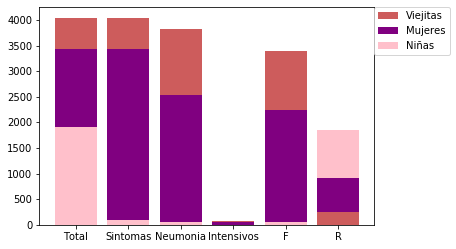

In [108]:
fig,ax=pp.subplots()

ax.bar('Total',len(viejitas),label='Viejitas',color='indianred')
ax.bar('Total',len(mujeres),label='Mujeres',color='purple')
ax.bar('Total',len(ninias),label='Niñas',color='pink')

ax.bar('Sintomas',len(viejitas),color='indianred')
ax.bar('Sintomas',len(mujeres),color='purple')
ax.bar('Sintomas',len(ninias_sintomas),color='pink')

ax.bar('Neumonia',len(viejitas_neumonia),color='indianred')
ax.bar('Neumonia',len(mujeres_neumonia),color='purple')
ax.bar('Neumonia',len(ninias_neumonia),color='pink')

ax.bar('Intensivos',len(viejitas_intensivo),color='indianred')
ax.bar('Intensivos',len(mujeres_intensivo),color='purple')
ax.bar('Intensivos',len(ninias_intensivo),color='pink')

ax.bar('F',len(viejitas_fallecidas),color='indianred')
ax.bar('F',len(mujeres_fallecidas),color='purple')
ax.bar('F',len(ninias_fallecidas),color='pink')

ax.bar('R',len(ninias_recuperadas),color='pink')
ax.bar('R',len(mujeres_recuperadas),color='purple')
ax.bar('R',len(viejitas_recuperadas),color='indianred')
ax.legend(loc = (1,0.78))

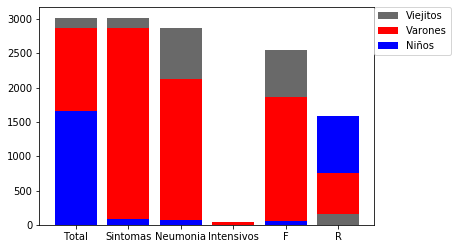

In [107]:
fig,ax=pp.subplots()

ax.bar('Total',len(viejitos),label='Viejitos',color='dimgrey')
ax.bar('Total',len(varones),label='Varones',color='red')
ax.bar('Total',len(ninios),label='Niños',color='blue')

ax.bar('Sintomas',len(viejitos),color='dimgrey')
ax.bar('Sintomas',len(varones),color='red')
ax.bar('Sintomas',len(ninios_sintomas),color='blue')

ax.bar('Neumonia',len(viejitos_neumonia),color='dimgrey')
ax.bar('Neumonia',len(varones_neumonia),color='red')
ax.bar('Neumonia',len(ninios_neumonia),color='blue')

ax.bar('Intensivos',len(viejitos_intensivo),color='dimgrey')
ax.bar('Intensivos',len(varones_intensivo),color='red')
ax.bar('Intensivos',len(ninios_intensivo),color='blue')

ax.bar('F',len(viejitos_fallecidas),color='dimgrey')
ax.bar('F',len(varones_fallecidas),color='red')
ax.bar('F',len(ninios_fallecidas),color='blue')

ax.bar('R',len(ninios_recuperadas),color='blue')
ax.bar('R',len(varones_recuperadas),color='red')
ax.bar('R',len(viejitos_recuperadas),color='dimgrey')

ax.legend(loc = (1,0.78))

In [110]:
import pandas as pd

total_ninios=(len(ninias)+len(ninios))
ninios_s=len(ninios_sintomas)+len(ninias_sintomas)
ninios_n=len(ninios_neumonia)+len(ninias_neumonia)
ninios_i=len(ninios_intensivo)+len(ninias_intensivo)
ninios_f=len(ninios_fallecidas)+len(ninias_fallecidas)
ninios_r=len(ninias_recuperadas)+len(ninios_recuperadas)

total_adultos = (len(mujeres)+len(varones))
adultos_s=len(mujeres)+len(varones)
adultos_n=len(mujeres_neumonia)+len(varones_neumonia)
adultos_i=len(mujeres_intensivo)+len(varones_intensivo)
adultos_f=len(mujeres_fallecidas)+len(varones_fallecidas)
adultos_r=len(mujeres_recuperadas)+len(varones_recuperadas)

total_mayores = (len(viejitas)+len(viejitos))
mayores_s=len(viejitas)+len(viejitos)
mayores_n=len(viejitas_neumonia)+len(viejitos_neumonia)
mayores_i=len(viejitas_intensivo)+len(viejitos_intensivo)
mayores_f=len(viejitas_fallecidas)+len(viejitos_fallecidas)
mayores_r=len(viejitas_recuperadas)+len(viejitos_recuperadas)


##Creacion de la tabla
tabla=pd.DataFrame(columns=('Total','Sintomas','Neumonia','Intensivos','Fallecidos','Recuperados'))
tabla.loc[len(tabla)]=[total_ninios, ninios_s, ninios_n, ninios_i, ninios_f, ninios_r]
tabla.loc[len(tabla)]=[total_adultos, adultos_s, adultos_n, adultos_i, adultos_f, adultos_r]
tabla.loc[len(tabla)]=[total_mayores, mayores_s, mayores_n, mayores_i, mayores_f, mayores_r]
tabla=tabla.rename(index={0:'Niños'})
tabla=tabla.rename(index={0:'Adultos'})
tabla=tabla.rename(index={0:'Mayores'})
tabla

,Total,Sintomas,Neumonia,Intensivos,Fallecidos,Recuperados
Niños,3568,175,135,2,119,3434
1,6295,6295,4658,89,4114,1656
2,7067,7067,6698,112,5951,402
